<a href="https://colab.research.google.com/github/Augustobar1991/Proyecto-Coderhouse-Data-Science/blob/main/Bank/Entrega/Informe_completo_Modelado_de_pr%C3%A9stamos_personales_(Barchi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'><ins><center>**Analizar a los clientes pasivos convirtiendolos en clientes de préstamos personales en Thera Bank**</center></ins></font>

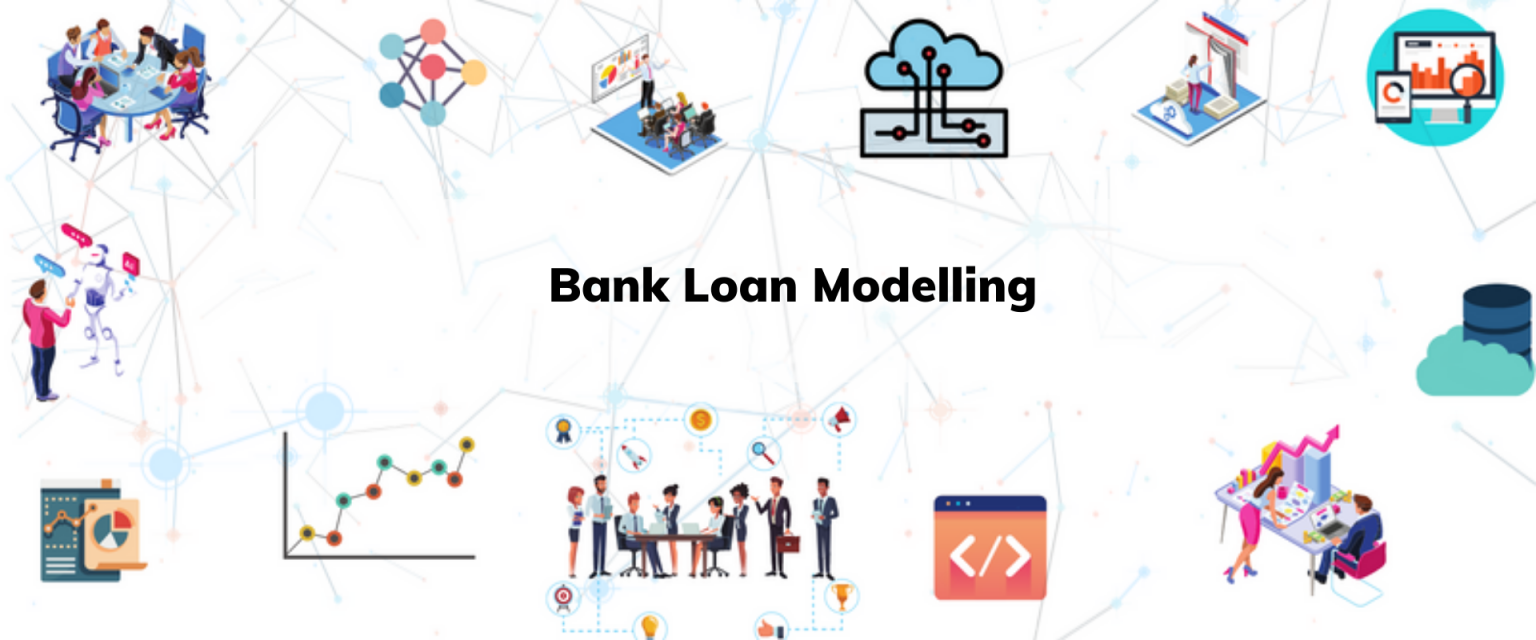

# **INDICE**

[1. Introducción](#scrollTo=JnHOj5Kh5KWG)\
[2. Contextos](#scrollTo=dnovr2a04fFs)\
[3. Objetivos](#scrollTo=oS0GiJJV4ioM)\
[4. Hipotesis](#scrollTo=eMofo1oy4l_1)\
[5. Motivacion](#scrollTo=PAFUNDOD4o5r)\
[6. Audiencia](#scrollTo=_PoGFsXySZnO)\
[7. Datase](#scrollTo=GHBD4D7kZ4PQ)
* [7.1 Librerias](#scrollTo=f3Is_0Sn7zIM)
* [7.2 Caracteristicas del Dataset](#scrollTo=BaD8zV6QYciV)
* [7.3 Paleta de colores](#scrollTo=2L7j9l37XClx)

[8. APIS Publicas](#scrollTo=fdk7o9lXoVNu)\
[9. Exploratory Data Analysis (EDA)](#scrollTo=jJwPrTm4OQYA)\
[10. Detección de valores atípicos o Outliers](#scrollTo=CQBGvLByMZSj)

* [10.1 Chequeamos los Outliers del Sueldo con respecto a las personas que hayan o no realizado un prestamo](#scrollTo=dll5ofjv2QWr)
* [10.2 Chequeamos los Outliers de los Gastos de tarjeta de creditos con respecto a las personas que hayan o no realizado un prestamo](#scrollTo=TZvSpyO06QmS)
* [10.3 Chequeamos los Outliers de las hipotecas con respecto a las personas que hayan o no realizado un prestamo](#scrollTo=tmA4z6Fa98ic)
* [10.4 Conclusion](#scrollTo=MwSrhu1DBE9I)

[11. Estructurando el proyecto de DS II](#scrollTo=MlXcAPxqSVJI)
* [11.1 Análisis univariado](#scrollTo=fnNw-hPyPqGP)
* [11.2.1 Cantidad de personas por regiones](#scrollTo=YaQhWkyMm3RW)
 * [11.1.2 Porcentajes de prestamos](#scrollTo=HzqVqy7UUYux)

* [11.2 11.2 Análisis univariado, bivariado y multivariado](#scrollTo=NcTONu39SGER)
 * [11.2.1 Grupo de ingreso segun la cuenta](#scrollTo=x0eV-m43nby1)
 * [11.2.2 Gasto](#scrollTo=SwRU4bJTQ8co)
 * [11.2.3 Heatmap](#scrollTo=6W98r_AElwBu)
 * [11.2.4 Boxplot de comparacion](#scrollTo=fZ51zKeuoA3n)
 * [11.2.5 Densidad de hipoteca vs prestamos](#scrollTo=Wubld0ifoJwY)
 * [11.2.6 Densidad de la edad vs prestamos](#scrollTo=vpLDS42aoPNo)
 * [11.2.7 Gastos de tarjeta de credito segun la educacion](#scrollTo=_Wwbiev3oUiI)

* [11.3 Años](#scrollTo=Rzw4uMVAxUas)
* [11.4 Ingreso](#scrollTo=RYwmob6Xy5af)
* [11.5 Gasto](#scrollTo=SwRU4bJTQ8co)

[12. Estructurando un proyecto de DS III](#scrollTo=BIBcaU9UeHRg)
* [12.1 Feature Engineering](#scrollTo=xHKYqZ6Bzt7-)
* [12.2 Arbol de decisiones](#scrollTo=1wRhsFcEeYS-)
* [12.3 Conclusión arboles de decisiones](#scrollTo=W85t_DZ2mMTF)
* [12.4 Ejemplo de evaluar si modelo tiene underfitting-overfitting](#scrollTo=7Q1XmuyinhVE)
* [12.5 Conclusión underfitting-overfitting](#scrollTo=vlfhA6OCmUa1)

[13. Models](#scrollTo=IriSxBPyaihW)
* [13.1 KNN](#scrollTo=ApVE28Do5JIZ)
* [13.2 Random forest](#scrollTo=Mgwg0jX27lzX)
* [13.3 Feature Importance](#scrollTo=HiOxeJ5aYozS)
* [13.4 Regresion logistica](#scrollTo=pmKFR88pFafc)
* [13.5 SVM](#scrollTo=qK1bijjJJ_yj)
* [13.6 Conclusion](#scrollTo=1GAZ1QLzccQv)

[14. Mejora de Modelos](#scrollTo=Mv3cN12NrWtd)
* [14.1 Mejora del modelo Random Forest](#scrollTo=CB4AFslXnskP)
* [14.2 Mejora del modelo Decision Tree Classifier](#scrollTo=Y415pttkriHh)
* [14.3 Conclusion](#scrollTo=VhD5S3t4T9ia)

[15. Analisis PCA](#scrollTo=mO4G2c0G6Hnn)
* [15.1 Stratified K-Fold cross validation](#scrollTo=YIhEraSIuLSq)
* [15.2 Conclusion](#scrollTo=t8FOCPnsFWIk)

[16. Boosting Models](#scrollTo=KwF7ODvYaXAm)
* [16.1 XGBOOST](#scrollTo=n0BjyWwocKKg)
* [16.2 LIGHTGBM](#scrollTo=vSOQy_qIqwhQ)
* [16.3 Conclusion](#scrollTo=LAct2TYqVQLh)

[17. Conclusion](#scrollTo=YjckVUqVKDhN)

**<h3>Integrantes del equipo:</h3>**
*   Augusto Barchi

# **<center><font color='red'><ins>Modelado de préstamos personales</ins></font></center>**

## <h3><strong>1. Introduccion</strong></h3>

Thera Bank es un banco estadounidense que tiene una base de clientes en crecimiento. La mayoría de estos clientes son clientes pasivos (depositantes) con distintos tamaños de depósitos. El número de clientes que también son prestatarios (clientes de activos) es bastante pequeño, y el banco está interesado en expandir esta base rápidamente para generar más negocios de préstamos y, en el proceso, ganar más a través de los intereses de los préstamos. En particular, la gerencia quiere explorar formas de convertir a sus clientes pasivos en clientes de préstamos personales (mientras los retiene como depositantes).

## <h3><strong>2. Contexto</strong></h3>

El año pasado se realizó una campaña para sus clientes de responsabilidad, la cual resultó en una tasa de conversión saludable. Este éxito ha motivado al departamento de marketing minorista del banco a diseñar nuevas campañas con un mejor enfoque de marketing para aumentar aún más la tasa de éxito en la conversión de clientes pasivos en prestatarios.

## <h3><strong>3. Objetivos</strong></h3>

Como científico de datos en Thera Bank, debemos determinar las características mas significativas del cliente, con estudios de estadísticas para medir la precisión o el error que pueda tener el modelo y que sea alcanzable mediante iteraciones, que ayude al departamento de marketing, a identificar y predecir con una mayor probabilidad, a clientes potenciales de solicitar un préstamo, mediante un análisis de datos, que llevará un tiempo en que se realizará este proyecto, siendo este de 7 meses.

## <h3><strong>4. Hipotesis</strong></h3>
- ¿Qué variables son las más significativas?

- ¿La región o condado son variables significativas?

- ¿A qué segmento de clientes debería dirigirse más?
- ¿La edad tiene algún impacto en el préstamo de compra del cliente?
- ¿Las personas con menos ingresos piden préstamos?

## <h3><strong>5. Motivación</strong></h3>

Entender estructurando un proyecto de DS, realizando EDA, Feature Engineering, aplicando modelos de Machine Learning, y Decision tree y explorar estos algoritmos usando Sklearn Decision Trees.

## **6. Audiencia**

Este análisis está dirigido a la gerencia encargada de tomar decisiones en Thera Bank. Su objetivo es proporcionar una comprensión más profunda de los clientes del banco y determinar si son elegibles para recibir préstamos o créditos. El análisis también evalúa el comportamiento de los clientes en función de varios parámetros para mejorar la toma de decisiones de la gerencia en relación con la expansión de la base de clientes prestatarios.

# **<ins>7. Dataset</ins>**

## **<ins><font color='green'>7.1 Se importa la libreria pandas, numpy, seaborn, etc</font></ins>**

In [2]:
# importacion de las librerias basicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
%matplotlib inline
import warnings
import statsmodels.api as sm
import missingno as msno
import requests
import json
import plotly.express as px
# -----------------------------------------------------
# importacion de las librerias de ML
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------
# importacion de las librerias de Models
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
# Analisis PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV as gcv
from sklearn.model_selection import cross_val_score
# Analisis K-Fold
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
# Analisis Xboost
import xgboost as xgb
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
import scipy.sparse as sp
#pip install lightgbm
import lightgbm as lgb

In [3]:
# cambio de tamaño del output
from IPython.display import HTML
shell = get_ipython()
def adjust_font_size():
  display(HTML('''<style>body {font-size: 16px;}''')) # tamaño de font 16px
if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [4]:
url = 'https://raw.githubusercontent.com/Augustobar1991/Proyecto-Coderhouse-Data-Science/main/Bank/Bank.csv'
respuesta= requests.get(url) # testeamos que nuestro dataset se hayan leido correctamente
if respuesta.status_code==200: #si la respuesta es 200 significa que la conexion fue exitosa
  print('\x1b[1m'+ "Conexion retornada " +f"{respuesta.status_code}: Conexion exitosa"+'\x1b[0m')
else:
  print(f"Conexion retornada {respuesta.status_code} : '{respuesta.reason}'")

Conexion retornada 200: Conexion exitosa


In [5]:
df_bank = pd.read_csv(url) # leemos nuestro dataset (es un archivo csv)
df_bank.info() # visualizamos la informacion de cada columna
df_bank # visualizamos algunos datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


##**<font color='green'>7.2 Caracteristicas del Dataset</font>**

- ID: ID del cliente
- Age: Edad [23-67]
- Experience: Experiencia [1-45]
- Income: Sueldo [8 – 885 k]
- ZIP Code: Código Postal [varia]
- Family: Miembros de Familia [1-4]
- CCAvg: Gasto de tarjeta de credito [0-10 k]
- Education: Educación [1: Secundaria, 2: Universitario, 3: Master]
- Mortgage: Hipoteca [0-700 k]
- Personal_Loan: Prestamo hecho en la ultima campaña[0 o 1]
- Securities Account: Cuenta de seguridad [0,1]
- CD Account: Cuenta de deposito [0,1]
- Online: Online [0,1]
- CreditCard: Tarjeta de Crédito de otro banco [0,1]

In [6]:
# Se copia el dataset para ser modificado sin tocar el original
df_loan=df_bank.copy()

In [7]:
#La columna de identificación no es necesaria y se puede descartar por eso se opto por dropearla (borrarla)
df_loan.drop(['ID'],axis=1,inplace=True) #droppeando id

In [8]:
# Se renombra las columnas para que sean mas facil de entender
df_loan.rename(columns={"Age":"Edad",
                        "Experience": "Experiencia",
                        "Income": "Sueldo",
                        "ZIP Code":"CP",
                        "Personal Loan":"Prestamo",
                        "Securities Account":"Cuenta_de_Seguridad",
                        "Family": "Familia",
                        "CCAvg": "Gasto_de_tarjeta_cred",
                        "Education": "Educacion",
                        "Mortgage": "Hipoteca",
                        "Securities Account": "Cuenta_de_seguridad",
                        "CD Account": "Cuenta_deposito",
                        "CreditCard": "Tarjeta_Crédito"
},inplace=True)

##**7.3 Paleta de colores**

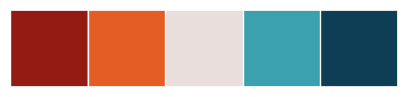

In [9]:
# funcion creada para tener una paleta de colores en hex
sns.set()

def hex_to_rgb(hex_value):
  h = hex_value.lstrip('#')
  return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

hex_colors = ['#941a14', '#e35d24','#eadedd','#3ba1ae','#0d3e56']
rgb_colors = list(map(hex_to_rgb, hex_colors))
sns.palplot(rgb_colors)

In [10]:
color_FI = sns.color_palette("blend:#0d3e56,#941a14", 12)
color_FI

[(0.050980392156862744, 0.24313725490196078, 0.33725490196078434),
 (0.09873125720876585, 0.23040369088811996, 0.31391003460207617),
 (0.14648212226066898, 0.2176701268742791, 0.29056516724336795),
 (0.1942329873125721, 0.2049365628604383, 0.2672202998846598),
 (0.24405997693194925, 0.19164936562860438, 0.24286043829296428),
 (0.2918108419838524, 0.17891580161476356, 0.21951557093425605),
 (0.33956170703575544, 0.1661822376009227, 0.1961707035755479),
 (0.38731257208765857, 0.1534486735870819, 0.1728258362168397),
 (0.4371395617070357, 0.140161476355248, 0.1484659746251442),
 (0.48489042675893884, 0.12742791234140716, 0.125121107266436),
 (0.532641291810842, 0.11469434832756631, 0.1017762399077278),
 (0.5803921568627451, 0.10196078431372549, 0.0784313725490196)]

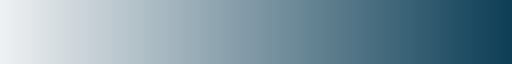

In [11]:
color_headmap = sns.color_palette("light:#0d3e56", as_cmap=True)
color_headmap

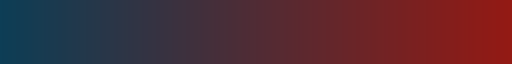

In [12]:
color_matrix = sns.color_palette("blend:#0d3e56,#941a14", as_cmap=True)
color_matrix

# <ins>8. APIS Publicas</ins>

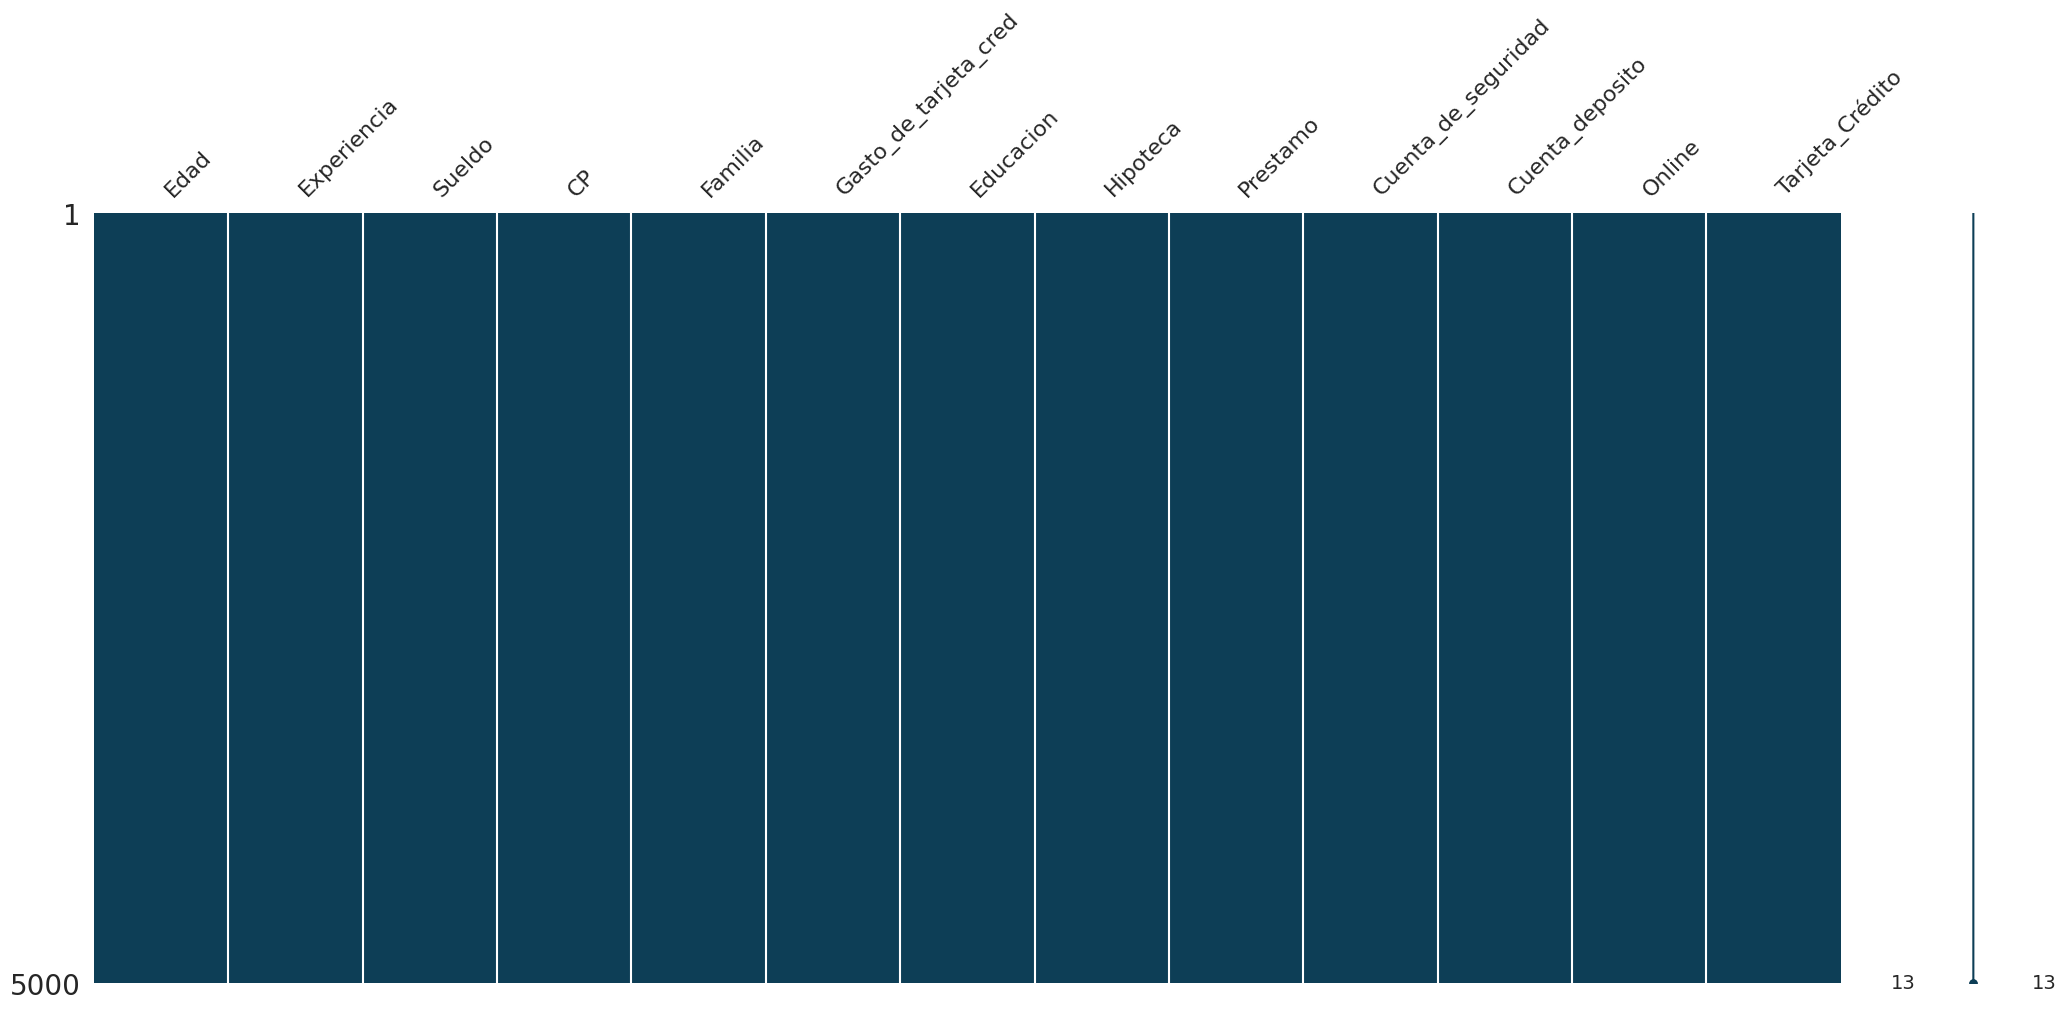

In [13]:
#chequeamos el dataset original de que no hayan datos faltantes con matrix antes de agregar la siguiente columna
msno.matrix(df_loan, color = (rgb_colors[4]))
plt.show()

In [14]:
# chequeamos de que no hayan valores duplicados antes de mergear la nueva columna del condado
duplicado=df_loan.duplicated().sum()
print('Valores duplicados:', duplicado)

Valores duplicados: 0


In [15]:
# importamos la api nueva de los datos de los condados, ciudades, CP, lat, long, etc
url='https://raw.githubusercontent.com/Augustobar1991/Proyecto-Coderhouse-Data-Science/main/Bank/ZipCode_County.json'
respuesta= requests.get(url)
if respuesta.status_code==200: #si la respuesta es 200 significa que la conexion fue exitosa
  print('\x1b[1m' + "Conexion retornada " + f"{respuesta.status_code}: Conexion exitosa"+'\x1b[0m')
else:
  print(f"Conexion retornada {respuesta.status_code} : '{respuesta.reason}'")

Conexion retornada 200: Conexion exitosa


In [16]:
# importamos los datos de la api a travez de un archivo json
texto=respuesta.text
json_data=json.loads(texto)
CPUS=pd.DataFrame.from_dict(json_data)
CPUS # visualizamos algunos datos de la api

,acceptable_cities,active,area_codes,city,country,county,lat,long,state,timezone,unacceptable_cities,world_region,zip_code,zip_code_type
0,[],True,[626],Pasadena,US,Los Angeles County,34.1620,-118.0894,CA,America/Los_Angeles,[],NA,91107,STANDARD
1,[],True,[213],Los Angeles,US,Los Angeles County,34.0218,-118.2883,CA,America/Los_Angeles,[University Of Southern Ca],NA,90089,UNIQUE
2,[],True,[510],Berkeley,US,Alameda County,37.8746,-122.2547,CA,America/Los_Angeles,[Uc Berkeley],NA,94720,UNIQUE
3,[],True,"[510, 415, 650]",San Francisco,US,San Francisco County,37.7217,-122.4446,CA,America/Los_Angeles,[],NA,94112,STANDARD
4,[],True,[213],Northridge,US,Los Angeles County,34.2429,-118.5273,CA,America/Los_Angeles,[Ca State Univ Northridge],NA,91330,UNIQUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,[],True,"[510, 707, 925]",Walnut Creek,US,Contra Costa County,37.8994,-121.9921,CA,America/Los_Angeles,[],NA,94598,STANDARD
463,[],True,"[657, 714]",Irvine,US,Orange County,33.646197,-117.839797,CA,America/Los_Angeles,[],NA,92717,STANDARD
464,[],True,"[657, 714]",Walnut Creek,US,Orange County,37.8994,-121.9921,CA,America/Los_Angeles,[],NA,9307,STANDARD
465,[],True,"[657, 714]",Fullerton,US,Fullerton,33.8739,-117.9028,CA,America/Los_Angeles,[],NA,92634,STANDARD


In [17]:
CPUS.zip_code = CPUS.zip_code.astype('int64') #modificamos el tipo de dato, de object a int64

In [18]:
# dropeamos las columnas que no necesitamos de la api
CPUS.drop(columns=["acceptable_cities", "active","area_codes",'city','country','lat','long','state','timezone'
,'unacceptable_cities','world_region','zip_code_type'], inplace=True)
# renombramos las columnas que necesitamos de la api
CPUS.rename(columns={"zip_code":"CP","county":"Condado"},inplace=True)

In [19]:
# mergeamos nuestro dataset df_loan con la api de CPUS de la forma left
df_loan = pd.merge(df_loan, CPUS, on=['CP'], how='left')
df_loan

,Edad,Experiencia,Sueldo,CP,Familia,Gasto_de_tarjeta_cred,Educacion,Hipoteca,Prestamo,Cuenta_de_seguridad,Cuenta_deposito,Online,Tarjeta_Crédito,Condado
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Orange County
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,San Diego County
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Ventura County
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Los Angeles County


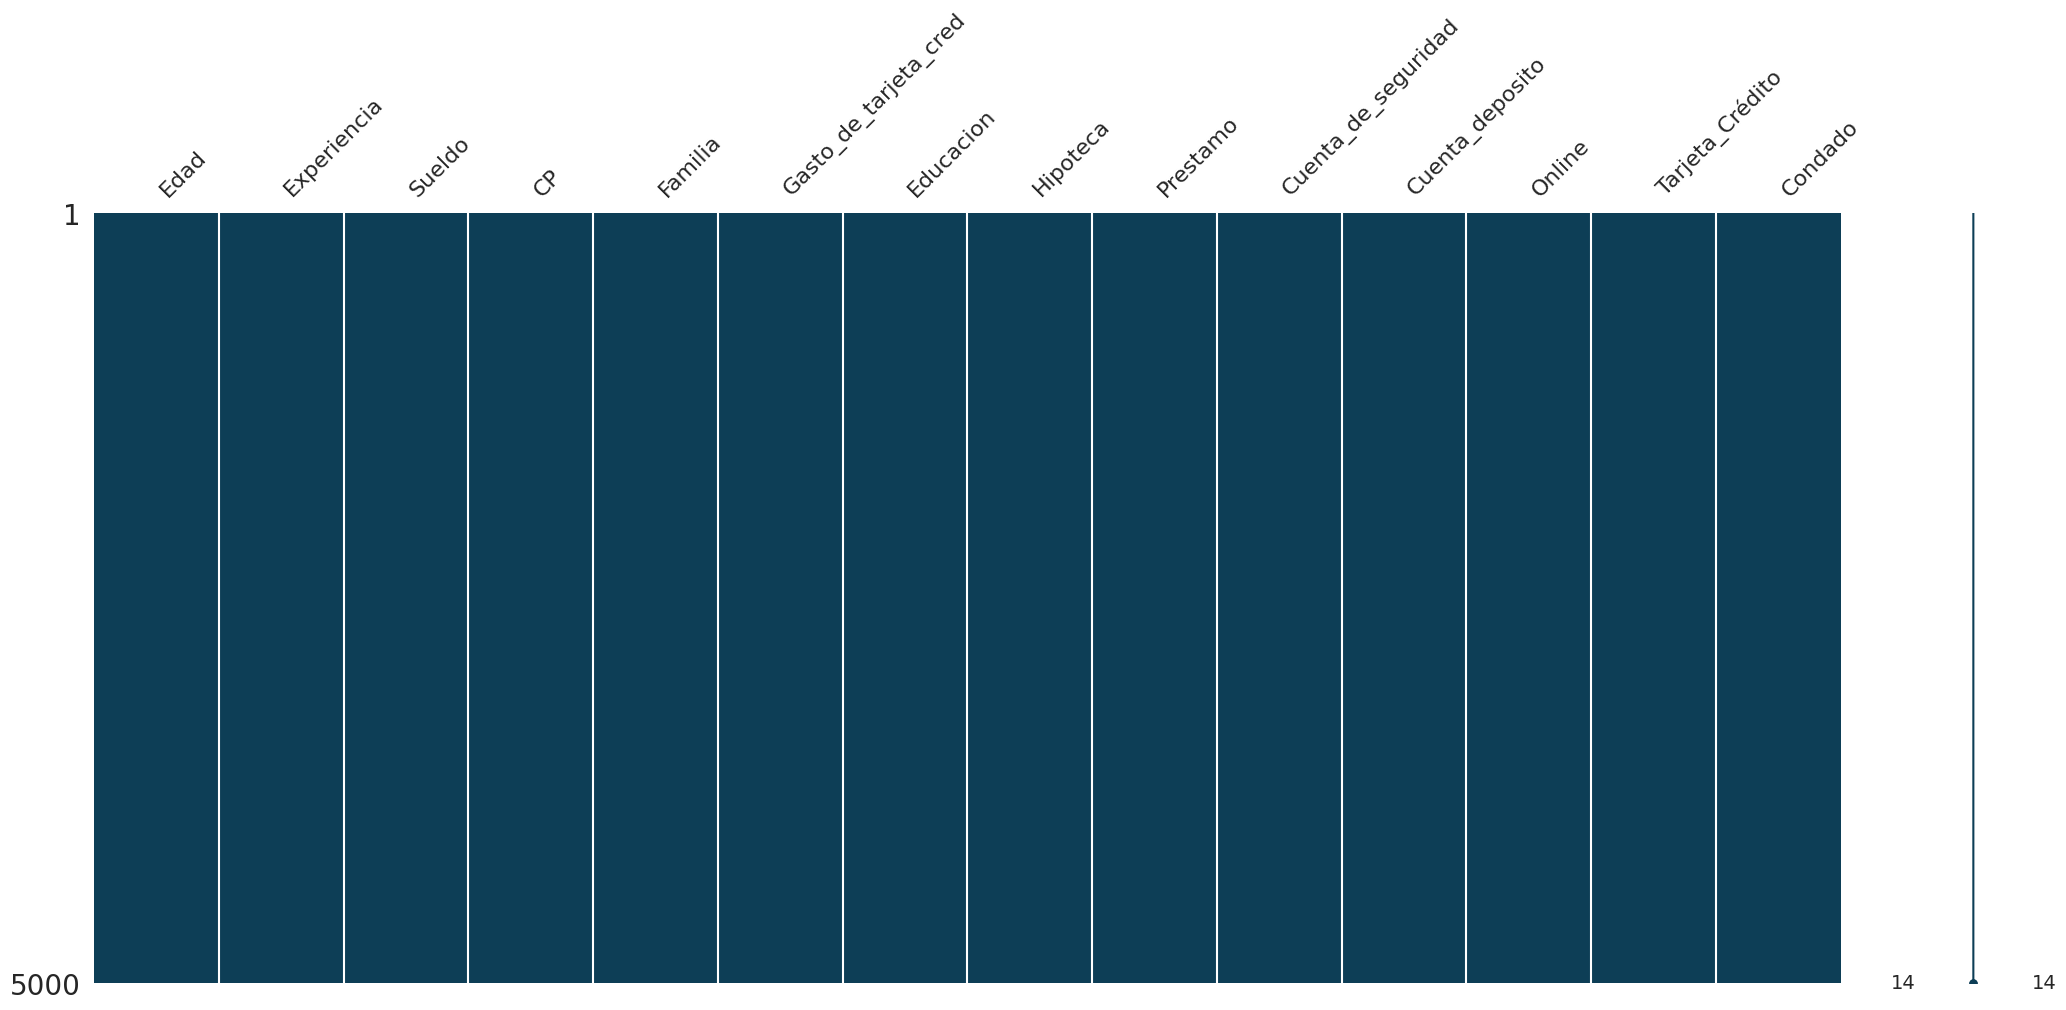

In [20]:
#chequeamos los datos faltantes con matrix
msno.matrix(df_loan, color=(rgb_colors[4]))
plt.show()

In [21]:
# chequeamos que no hayan valores nulos en la nueva columna agregada
nullcondado=pd.isnull(df_loan["Condado"]).sum()
print('\x1b[1m'+ "Cantidad de valores nulos: " + f"{nullcondado}" + '\x1b[0m')

Cantidad de valores nulos: 0


In [22]:
# chequeamos que no hayan valores duplicados en la nueva columna agregada
valorduplicado=df_loan.duplicated().sum()
print('\x1b[1m'+ "Cantidad de valores duplicados: " + f"{valorduplicado}" + '\x1b[0m')
#df_loan.drop_duplicates() # como no tenemos valores duplicados, no es necesario ejecutar este comando

Cantidad de valores duplicados: 0


# **9. Exploratory Data Analysis (EDA)**

In [23]:
# Se describe las tablas del dataset
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experiencia,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Sueldo,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CP,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Familia,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
Gasto_de_tarjeta_cred,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Educacion,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Hipoteca,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Prestamo,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Cuenta_de_seguridad,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Hipótesis y recomendaciones**

- La edad de los clientes está en el rango de 23 a 67 años, con una media y una mediana de ~45.
- La experiencia máxima es de 43 años. donde la media y la mediana son ~20.
- Los ingresos están en el rango de 8k a 224k USD. La media es 73k USD y la mediana es 64k USD. 224 El salario máximo debe verificarse.
- La hipoteca máxima tomada es de 635k USD. Necesito verificar esto.
- El gasto promedio en tarjeta de crédito por mes oscila entre 1 y 10 000 con una media de 1,9 000 USD y una mediana de 1,5 000 USD.
- 1095 clientes son del condado de Los Ángeles.
480 clientes habían pedido prestado préstamo antes.

In [24]:
# Comprobar valores negativos y cero para la experiencia
df_loan[df_loan['Experiencia']<0]['Edad'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Edad, dtype: float64

In [25]:
# 52 clientes del grupo de edad 23 - 30 tienen valores negativos en la experiencia
df_loan[df_loan['Experiencia']<0].sort_values(by='Experiencia',ascending=True)

,Edad,Experiencia,Sueldo,CP,Familia,Gasto_de_tarjeta_cred,Educacion,Hipoteca,Prestamo,Cuenta_de_seguridad,Cuenta_deposito,Online,Tarjeta_Crédito,Condado
4514,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0,Los Angeles County


In [26]:
# Agrupamos las personas por edad, educacion y experiencia
df_loan.groupby(['Edad','Educacion'])['Experiencia'].describe().T

Edad             23                   24                       25             \
Educacion         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000   
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

Edad                         26            ...         64         65  \
Educacion          3          1         2  ...          3          1   
count      19.000000  30.000000  24.00000  ...  30.000000  30.000000   
mean       -0.526316   1.433333   0.75000  ...  38.533333  39.866667   
std         0.696692   0.817200   0.84699  ...   1.756433   0.730297   
min        -2.000000   0.000000  -1.00000  ...  34.000000  39.000000   
25%        -1.000000   1.000000   0.00000  ...  38.000000  39.000000   
50%        -1.000000   2.000000   1.00000  ...  39.000000  40.000000   
75%         0.000000   2.000000   1.00000  ...  40.000000  40.000000   
max         1.000000   2.000000   2.00000  ...  40.000000  41.000000   

Edad                                    66                               67  \
Educacion          2          3          1          2          3          1   
count      23.000000  27.000000   9.000000   5.000000  10.000000   5.000000   
mean       40.086957  39.518519  41.111111  41.400000  40.400000  41.600000   
std         0.733178   1.553417   0.333333   0.547723   1.646545   0.894427   
min        39.000000  35.000000  41.000000  41.000000  36.000000  41.000000   
25%        40.000000  39.000000  41.000000  41.000000  40.250000  41.000000   
50%        40.000000  40.000000  41.000000  41.000000  41.000000  41.000000   
75%        41.000000  41.000000  41.000000  42.000000  41.000000  42.000000   
max        41.000000  41.000000  42.000000  42.000000  42.000000  43.000000   

Edad                            
Educacion          2         3  
count       3.000000   4.00000  
mean       42.666667  41.50000  
std         0.577350   0.57735  
min        42.000000  41.00000  
25%        42.500000  41.00000  
50%        43.000000  41.50000  
75%        43.000000  42.00000  
max        43.000000  42.00000  

[8 rows x 134 columns]

**<h4><font color='red'>Aclaracion: Por lo que se ve la experiencia es negativa para todas las observaciones con 23, 24 años y algunos otros. Según la edad y la educación, parece que los valores fueron negativos por error. cambiándolo así a valores absolutos de experiencia.</font></h4>**

In [27]:
df_loan.loc[df_loan['Experiencia']<0,'Experiencia']=np.abs(df_loan['Experiencia'])
df_loan[df_loan['Experiencia']==0]['Edad'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Edad, dtype: float64

In [28]:
# convertir variable categórica a tipo de categoría
category_col = ['Prestamo', 'Cuenta_de_seguridad','Familia', 'Cuenta_deposito', 'Online', 'Tarjeta_Crédito', 'CP', 'Educacion','Condado']
df_loan[category_col] = df_loan[category_col].astype('category')
for column in category_col: # imprimimos la cantidad de valores que hay para cada columna y tipo
    print(df_loan[column].value_counts())
    print("#" * 40)

0    4520
1     480
Name: Prestamo, dtype: int64
########################################
0    4478
1     522
Name: Cuenta_de_seguridad, dtype: int64
########################################
1    1472
2    1296
4    1222
3    1010
Name: Familia, dtype: int64
########################################
0    4698
1     302
Name: Cuenta_deposito, dtype: int64
########################################
1    2984
0    2016
Name: Online, dtype: int64
########################################
0    3530
1    1470
Name: Tarjeta_Crédito, dtype: int64
########################################
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: CP, Length: 467, dtype: int64
########################################
1    2096
3    1501
2    1403
Name: Educacion, dtype: int64
########################################
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alam

# **10. Detección de valores atípicos o Outliers**

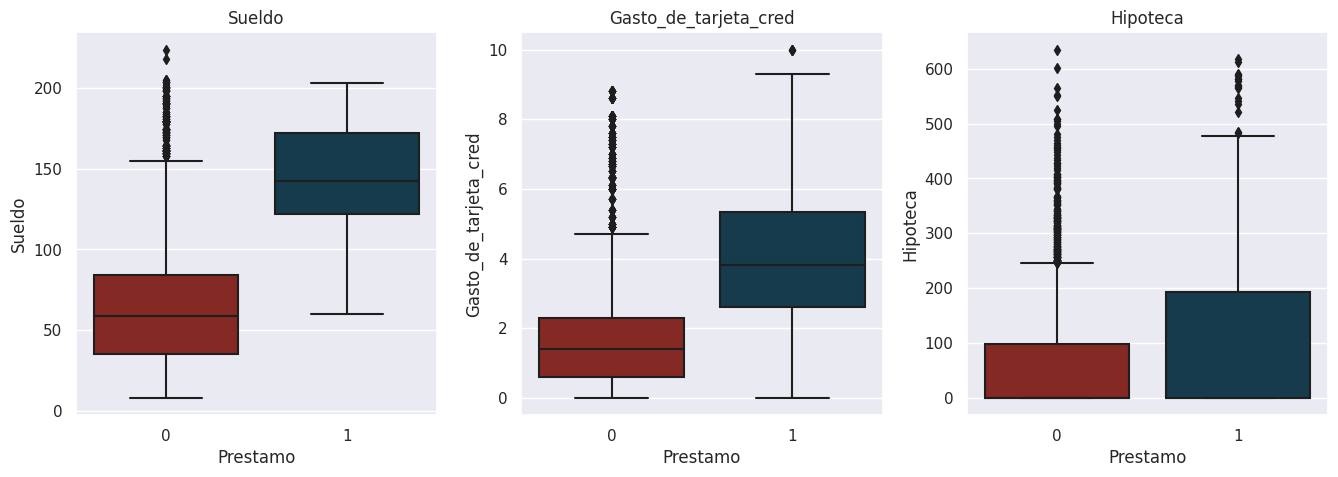

In [29]:
# detección de valores atípicos mediante diagrama de caja
numeric_columns =['Sueldo','Gasto_de_tarjeta_cred','Hipoteca']
plt.figure(figsize=(18,18))
sns.set_palette(sns.color_palette((rgb_colors[0],rgb_colors[4])))
for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     sns.boxplot(y=df_loan[variable],x='Prestamo', data=df_loan,whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

## **10.1 Chequeamos los Outliers del Sueldo con respecto a las personas que hayan o no realizado un prestamo**

In [30]:
# mostramos los valores minimos, maximos y cuartiles para los que pidieron un prestamo o no, de acuerdo al sueldo
groupby_prestamo_sueldo=df_loan.groupby("Prestamo")["Sueldo"]
sueldo_cuartiles = (groupby_prestamo_sueldo).quantile([0.25,0.50,0.75])
minsueldo=groupby_prestamo_sueldo.min()
maxsueldo=groupby_prestamo_sueldo.max()

print('\x1b[1m'+'Sueldo minimo' + '\x1b[0m')
print(f"{minsueldo}")
print('-'*42)
print('\x1b[1m'+'Sueldo cuartil' + '\x1b[0m')
print(f"{sueldo_cuartiles}")
print('-'*42)
print('\x1b[1m'+'Sueldo maximo' + '\x1b[0m')
print(f"{maxsueldo}")

Sueldo minimo
Prestamo
0     8
1    60
Name: Sueldo, dtype: int64
------------------------------------------
Sueldo cuartil
Prestamo      
0         0.25     35.0
          0.50     59.0
          0.75     84.0
1         0.25    122.0
          0.50    142.5
          0.75    172.0
Name: Sueldo, dtype: float64
------------------------------------------
Sueldo maximo
Prestamo
0    224
1    203
Name: Sueldo, dtype: int64


**<h4><font color='red'>Aclaracion: Como vemos los sueldos mayores a 84 se concideran outliers cuando no poseen prestamos, y 172 cuando tienen un prestamo. Siendo los valores minimos de 8 y maximos de 224 cuando no tienen un prestamo y 60 el sueldo minimo y 203 el sueldo maximo cuando pidieron un prestamo</font></h4>**

**Valores Atipicos**

In [31]:
# chequeamos el rango intercuartilico sin haber pedido un prestamo
sueldo_iqr_0 = sueldo_cuartiles[0,0.75]-sueldo_cuartiles[0,0.25]
sueldo_ri_max_0=sueldo_cuartiles[0,0.75]+1.5*sueldo_iqr_0
print('\x1b[1m'+ 'El rango Intercuartílico Máximo sin préstamo es de ' + f"{sueldo_ri_max_0}" + '\x1b[0m')

El rango Intercuartílico Máximo sin préstamo es de 157.5


In [32]:
#valores atipicos sin prestamo
valores_atipicos_0 = []
for i in (df_loan[df_loan['Prestamo'] == 0]).Sueldo:
  if i > sueldo_ri_max_0:
    valores_atipicos_0.append(i)
contador0=0
for i in valores_atipicos_0:
  contador0=contador0+1
print('\x1b[1m'+ 'Existe ' + f"{contador0}" + " personas con valores atipicos sin haber pedido un prestamo" + '\x1b[0m')

Existe 178 personas con valores atipicos sin haber pedido un prestamo


In [33]:
# chequeamos el rango intercuartilico habiendo pedido un prestamo
sueldo_iqr_1 = sueldo_cuartiles[1,0.75]-sueldo_cuartiles[1,0.25]
sueldo_ri_max_1=sueldo_cuartiles[1,0.75]+1.5*sueldo_iqr_1
print('\x1b[1m'+ 'El rango Intercuartílico Máximo con préstamo es de ' + f"{sueldo_ri_max_1}" + '\x1b[0m')

El rango Intercuartílico Máximo con préstamo es de 247.0


In [34]:
#valores atipicos sin prestamo
valores_atipicos_1 = []
for i in (df_loan[df_loan['Prestamo'] == 1]).Sueldo:
  if i > sueldo_ri_max_1:
    valores_atipicos_0.append(i)
contador1=0
for i in valores_atipicos_1:
  contador1=contador1+1
print('\x1b[1m'+'Existe '+f"{contador1}"+" personas con valores atipicos habiendo pedido un prestamo"+'\x1b[0m')

Existe 0 personas con valores atipicos habiendo pedido un prestamo


In [35]:
# verificamos los outliers de sueldo que no pidieron prestamo para luego asignarle el valor maximo de sueldo_ri_max_0
outliers_sueldo_no_prestamo = df_loan[df_loan['Prestamo'] == 0]['Sueldo'][df_loan[df_loan['Prestamo'] == 0]['Sueldo'] > sueldo_ri_max_0]
outliers_sueldo_no_prestamo

27      158
59      188
97      161
148     163
172     171
       ... 
4873    165
4895    201
4937    162
4981    195
4993    218
Name: Sueldo, Length: 178, dtype: int64

In [36]:
# los outliers de sueldo que no pidieron prestamo se le asigna el valor maximo de sueldo_ri_max_0
df_loan.loc[(df_loan['Prestamo'] == 0) & (df_loan['Sueldo'] > sueldo_ri_max_0), 'Sueldo'] = sueldo_ri_max_0

In [37]:
# verificamos los outliers que pidieron prestamo para luego asignarle el valor de sueldo_cuartiles del 50%
outliers_sueldo_con_prestamo = df_loan[df_loan['Prestamo'] == 1]['Sueldo'][df_loan[df_loan['Prestamo'] == 1]['Sueldo'] > sueldo_ri_max_1]
outliers_sueldo_con_prestamo

Series([], Name: Sueldo, dtype: float64)

## **10.2 Chequeamos los Outliers de los Gastos de tarjeta de creditos con respecto a las personas que hayan o no realizado un prestamo**

In [38]:
# mostramos los valores minimos, maximos y cuartiles para los que pidieron un prestamo o no, de acuerdo al sueldo
groupby_prestamo_gtc=df_loan.groupby("Prestamo")["Gasto_de_tarjeta_cred"]
gtc_cuartiles = (groupby_prestamo_gtc).quantile([0.25,0.50,0.75])
mingtc=groupby_prestamo_gtc.min()
maxgtc=groupby_prestamo_gtc.max()
print('\x1b[1m'+'Gastos de tarjeta de credito minimo '+ '\x1b[0m')
print(f"{mingtc}")
print('-----------------------------------------')
print('\x1b[1m'+'Gastos de tarjeta de credito cuartil '+ '\x1b[0m')
print(f"{gtc_cuartiles}")
print('-----------------------------------------')
print('\x1b[1m'+'Gastos de tarjeta de credito maximo ' + '\x1b[0m')
print(f"{maxgtc}")

Gastos de tarjeta de credito minimo 
Prestamo
0    0.0
1    0.0
Name: Gasto_de_tarjeta_cred, dtype: float64
-----------------------------------------
Gastos de tarjeta de credito cuartil 
Prestamo      
0         0.25    0.6000
          0.50    1.4000
          0.75    2.3000
1         0.25    2.6000
          0.50    3.8000
          0.75    5.3475
Name: Gasto_de_tarjeta_cred, dtype: float64
-----------------------------------------
Gastos de tarjeta de credito maximo 
Prestamo
0     8.8
1    10.0
Name: Gasto_de_tarjeta_cred, dtype: float64


**Valores Atipicos**

In [39]:
# chequeamos el rango intercuartilico sin haber pedido un prestamo
gtc_iqr_0 = gtc_cuartiles[0,0.75]-gtc_cuartiles[0,0.25]
gtc_ri_max_0=gtc_cuartiles[0,0.25]+1.5*gtc_iqr_0
print('\x1b[1m'+ 'Rango Intercuartilico Maximo sin prestamo ' + f"{gtc_ri_max_0}" + '\x1b[0m')

Rango Intercuartilico Maximo sin prestamo 3.15


In [40]:
#valores atipicos sin prestamo
valores_atipicos_0_gtc = []
for i in (df_loan[df_loan['Prestamo'] == 0]).Gasto_de_tarjeta_cred:
  if i > gtc_ri_max_0:
    valores_atipicos_0_gtc.append(i)
contador0=0
for i in valores_atipicos_0_gtc:
  contador0=contador0+1
print('\x1b[1m'+'Existe '+f"{contador0}"+" personas con valores atipicos sin haber pedido un prestamo"+'\x1b[0m')

Existe 528 personas con valores atipicos sin haber pedido un prestamo


In [41]:
# chequeamos el rango intercuartilico habiendo pedido un prestamo
gtc_iqr_1 = gtc_cuartiles[1,0.75]-gtc_cuartiles[1,0.25]
gtc_ri_max_1=gtc_cuartiles[1,0.75]+1.5*gtc_iqr_1
print('\x1b[1m'+ 'Rango Intercuartilico Maximo con prestamo ' + f"{gtc_ri_max_1}" + '\x1b[0m')

Rango Intercuartilico Maximo con prestamo 9.46875


In [42]:
#valores atipicos sin prestamo
valores_atipicos_1_gtc = []
for i in (df_loan[df_loan['Prestamo'] == 1]).Gasto_de_tarjeta_cred:
  if i > gtc_ri_max_1:
    valores_atipicos_1_gtc.append(i)
contador1=0
for i in valores_atipicos_1_gtc:
  contador1=contador1+1
print('\x1b[1m'+'Existe '+f"{contador1}"+" personas con valores atipicos habiendo pedido un prestamo"+'\x1b[0m')

Existe 3 personas con valores atipicos habiendo pedido un prestamo


In [43]:
# verificamos los outliers de Gasto_de_tarjeta_cred que no pidieron prestamo para luego asignarle el valor maximos de gtc_ri_max_0
outliers_GTC_no_prestamo = df_loan[df_loan['Prestamo'] == 0]['Gasto_de_tarjeta_cred'][df_loan[df_loan['Prestamo'] == 0]['Gasto_de_tarjeta_cred'] > gtc_ri_max_0]
outliers_GTC_no_prestamo

12      3.80
24      3.90
44      5.70
48      4.50
55      8.00
        ... 
4937    8.60
4963    4.50
4964    4.90
4973    4.00
4993    6.67
Name: Gasto_de_tarjeta_cred, Length: 528, dtype: float64

In [44]:
# los outliers de Gasto_de_tarjeta_cred que no pidieron prestamo se le asigna el valor maximos de gtc_ri_max_0
df_loan.loc[(df_loan['Prestamo'] == 0) & (df_loan['Gasto_de_tarjeta_cred'] > gtc_ri_max_0), 'Gasto_de_tarjeta_cred'] = gtc_ri_max_0

In [45]:
# verificamos los outliers de Gasto_de_tarjeta_cred que pidieron prestamo para luego asignarle el valor maximos de gtc_ri_max_0
outliers_GTC_con_prestamo = df_loan[df_loan['Prestamo'] == 1]['Gasto_de_tarjeta_cred'][df_loan[df_loan['Prestamo'] == 1]['Gasto_de_tarjeta_cred'] > gtc_ri_max_1]
outliers_GTC_con_prestamo

787     10.0
2101    10.0
2337    10.0
Name: Gasto_de_tarjeta_cred, dtype: float64

In [46]:
# los outliers de Gasto_de_tarjeta_cred que pidieron prestamo se le asigna el valor maximos de gtc_ri_max_1
df_loan.loc[(df_loan['Prestamo'] == 1) & (df_loan['Gasto_de_tarjeta_cred'] > gtc_ri_max_1), 'Gasto_de_tarjeta_cred'] = gtc_ri_max_1

## **10.3 Chequeamos los Outliers de las hipotecas con respecto a las personas que hayan o no realizado un prestamo**

In [47]:
# mostramos los valores minimos, maximos y cuartiles para los que pidieron un prestamo o no, teniendo una hipoteca
groupby_prestamo_h=df_loan.groupby("Prestamo")["Hipoteca"]
h_cuartiles = (groupby_prestamo_h).quantile([0.25,0.50,0.75])
minh=groupby_prestamo_h.min()
maxh=groupby_prestamo_h.max()
print('\x1b[1m'+'Hipoteca minimo '+ '\x1b[0m')
print(f"{minh}")
print('-----------------------------------------')
print('\x1b[1m'+'Hipoteca cuartil ' + '\x1b[0m')
print(f"{h_cuartiles}")
print('-----------------------------------------')
print('\x1b[1m'+'Hipoteca maximo ' + '\x1b[0m')
print(f"{maxh}")

Hipoteca minimo 
Prestamo
0    0
1    0
Name: Hipoteca, dtype: int64
-----------------------------------------
Hipoteca cuartil 
Prestamo      
0         0.25      0.0
          0.50      0.0
          0.75     98.0
1         0.25      0.0
          0.50      0.0
          0.75    192.5
Name: Hipoteca, dtype: float64
-----------------------------------------
Hipoteca maximo 
Prestamo
0    635
1    617
Name: Hipoteca, dtype: int64


**Valores Atipicos**

In [48]:
# chequeamos el rango intercuartilico sin haber pedido un prestamo
h_iqr_0 = h_cuartiles[0,0.75]-h_cuartiles[0,0.75]
h_ri_max_0=h_cuartiles[0,0.75]+1.5*h_iqr_0
print('\x1b[1m'+ 'Rango Intercuartilico Maximo sin prestamo ' + f"{h_ri_max_0}" + '\x1b[0m')

Rango Intercuartilico Maximo sin prestamo 98.0


In [49]:
#valores atipicos sin prestamo
valores_atipicos_0_h = []
for i in (df_loan[df_loan['Prestamo'] == 0]).Hipoteca:
  if i > h_ri_max_0:
    valores_atipicos_0_h.append(i)
contador0=0
for i in valores_atipicos_0_h:
  contador0=contador0+1
print('\x1b[1m'+'Existe '+f"{contador0}"+" personas con valores atipicos sin haber pedido un prestamo"+'\x1b[0m')

Existe 1117 personas con valores atipicos sin haber pedido un prestamo


In [50]:
# chequeamos el rango intercuartilico habiendo pedido un prestamo
h_iqr_1 = h_cuartiles[1,0.75]-h_cuartiles[1,0.25]
h_ri_max_1=h_cuartiles[1,0.75]+1.5*h_iqr_1
print('\x1b[1m'+ 'Rango Intercuartilico Maximo con prestamo ' + f"{h_ri_max_1}" + '\x1b[0m')

Rango Intercuartilico Maximo con prestamo 481.25


In [51]:
#valores atipicos sin prestamo
valores_atipicos_1_h = []
for i in (df_loan[df_loan['Prestamo'] == 1]).Hipoteca:
  if i > h_ri_max_1:
    valores_atipicos_1_h.append(i)
contador1=0
for i in valores_atipicos_1_h:
  contador1=contador1+1
print('\x1b[1m'+'Existe '+f"{contador1}"+" personas con valores atipicos habiendo pedido un prestamo"+'\x1b[0m')

Existe 18 personas con valores atipicos habiendo pedido un prestamo


In [52]:
# verificamos los outliers de Hipoteca que no pidieron prestamo para luego asignarle el valor maximos de h_ri_max_0
outliers_h_no_prestamo = df_loan[df_loan['Prestamo'] == 0]['Hipoteca'][df_loan[df_loan['Prestamo'] == 0]['Hipoteca'] > h_ri_max_0]
outliers_h_no_prestamo

5       155
8       104
20      111
22      260
23      163
       ... 
4985    162
4987    159
4988    136
4990    219
4991    100
Name: Hipoteca, Length: 1117, dtype: int64

In [53]:
# los outliers de Hipoteca que no pidieron prestamo se le asigna el valor maximos de h_ri_max_0
df_loan.loc[(df_loan['Prestamo'] == 0) & (df_loan['Hipoteca'] > h_ri_max_0), 'Hipoteca'] = h_ri_max_0

In [54]:
# verificamos los outliers de Hipoteca que pidieron prestamo para luego asignarle el valor maximos de h_ri_max_1
outliers_h_con_prestamo = df_loan[df_loan['Prestamo'] == 1]['Hipoteca'][df_loan[df_loan['Prestamo'] == 1]['Hipoteca'] > h_ri_max_1]
outliers_h_con_prestamo

303     617
473     547
570     485
782     587
1372    483
1789    567
1937    589
2041    535
2541    569
2769    582
2841    565
2956    522
4345    577
4585    571
4655    581
4812    612
4842    590
4859    541
Name: Hipoteca, dtype: int64

In [55]:
# los outliers de Hipoteca que pidieron prestamo se le asigna el valor de maximos de h_ri_max_1
df_loan.loc[(df_loan['Prestamo'] == 1) & (df_loan['Hipoteca'] > h_ri_max_1), 'Hipoteca'] = h_ri_max_1

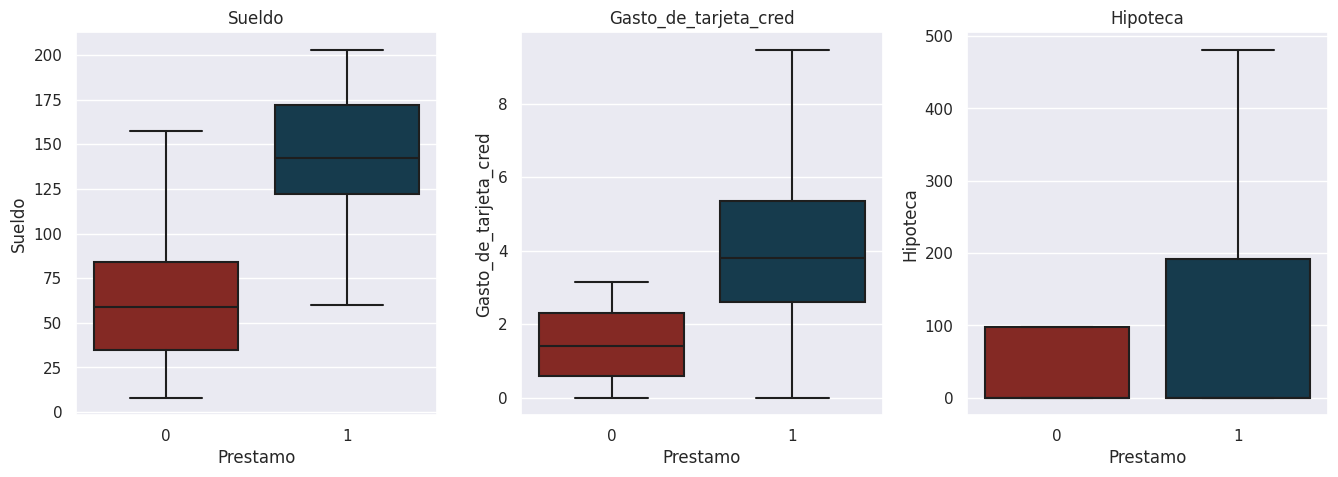

In [56]:
# chequeo final de valores atípicos mediante diagrama de caja y bigote
numeric_columns =['Sueldo','Gasto_de_tarjeta_cred','Hipoteca']
plt.figure(figsize=(18,18))
sns.set_palette(sns.color_palette((rgb_colors[0],rgb_colors[4])))
for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     sns.boxplot(y=df_loan[variable],x='Prestamo', data=df_loan,whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

## **10.4 Conclusion**

Se han identificado algunos ingresos extremadamente altos, de hasta 224.000 USD, en comparación con los ingresos promedio de personas del mismo grupo de edad y experiencia. Aunque los gastos en tarjetas de crédito e hipotecas parecen estar dentro de los límites aceptables, es importante abordar estos valores atípicos. Dado que se encontraron múltiples casos de valores atípicos, se ha decidido reemplazarlos con los valores de los cuartiles del 50%, dependiendo si el individuo solicitó o no un préstamo. De esta manera, se garantiza una mayor coherencia en los datos y se evita que estos valores extremos distorsionen los resultados.

# **11. Estructurando el proyecto de DS II**

## **11.1 Análisis univariado**

**Años**

La edad puede ser un factor vital en la obtención de un préstamo, convirtiendo las edades en contenedores para explorar si existe algún patrón.

In [57]:
df_loan['Agebin'] = pd.cut(df_loan['Edad'],
                           bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

**Ingreso**

Para comprender los segmentos de clientes que atienden nuevas columnas que nos ayudarán a identificar si el cliente pertenece al grupo de ingresos altos, medios o bajos.

In [58]:
df_loan["Grupo_ingreso"] = pd.cut(
    x=df_loan["Sueldo"],
    bins=[0, 50, 140, 224],
    labels=["Inferior", "Medio", "Alto"])

**Convertir el condado en regiones según https://www.calbhbc.org/region-map-and-listing.html**

In [59]:
condados = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',
'Ventura County':'Southern',
'San Bernardino County':'Southern',
'Contra Costa County':'Bay Area',
'Santa Cruz County':'Bay Area',
'Riverside County':'Southern',
'Kern County':'Southern',
'Marin County':'Bay Area',
'San Luis Obispo County':'Southern',
'Solano County':'Bay Area',
'Humboldt County':'Superior',
'Sonoma County':'Bay Area',
'Fresno County':'Central',
'Placer County':'Central',
'Butte County':'Superior',
'Shasta County':'Superior',
'El Dorado County':'Central',
'Stanislaus County':'Central',
'San Benito County':'Bay Area',
'San Joaquin County':'Central',
'Mendocino County':'Superior',
'Tuolumne County':'Central',
'Siskiyou County':'Superior',
'Trinity County':'Superior',
'Merced County':'Central',
'Lake County':'Superior',
'Napa County':'Bay Area',
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'}

In [60]:
df_loan['Region'] = df_loan['Condado'].map(condados)
df_loan['Region'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

### **11.1.1 Cantidad de personas por regiones**


In [61]:
# mostramos la cantidad de personas que hay por regiones
df_loan.dropna(inplace=True) # dropeamos valores null

fig = px.histogram(df_loan, x='Region',
             barmode='group', height=400,histfunc='count', text_auto=True,
             color_discrete_sequence=([hex_colors]))
fig.update_layout(title_text='REGION', title_x=0.5,font_size=14,yaxis=dict(showgrid=False),
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)')
fig.update_xaxes(categoryorder='total descending')
fig.show()

### **11.1.2 Porcentajes de prestamos**

In [62]:
# Verificamos la distribución en la columna de destino
fig = px.pie(df_loan, values=df_loan["Prestamo"].value_counts(),
             height=400, color_discrete_sequence=[hex_colors[0],hex_colors[4]])
fig.update_layout(title_text='PORCENTAJE DE PRESTAMOS', title_x=0.5,font_size=14)

El préstamo personal variable objetivo está muy desequilibrado, donde solo el 9,6% de los clientes han optado previamente por un préstamo personal en el conjunto de datos. Esto se puede manejar usando peso o SMOTE. Pero por ahora continuaremos sin SMOTE.

##**11.2 Análisis univariado, bivariado y multivariado**

### **11.2.1 Grupo de ingreso segun la cuenta**

In [63]:
fig = px.histogram(df_loan, x='Grupo_ingreso',color='Cuenta_deposito',
             barmode='group', height=400,histfunc='count', text_auto=True,
             color_discrete_sequence=[hex_colors[0],hex_colors[4]])
fig.update_layout(title_text='GRUPO DE INGRESOS SEGUN EL DEPOSITO DE CUENTA', title_x=0.5,font_size=14)
fig.show()

**<font color='red'><h4>Conclusión</h4></font>**

Los grupo de ingresos medios son los que tienen mas cuentas de deposito, quizas uno de los puntos debiles es que en porcentaje a la cantidad de clientes que no poseen cuenta de deposito con respecto a los que poseen una, es menor a los demas grupos de ingresos, esto deberia reveerse y en lo posible incrementar ese porcentaje, ya que son los clientes mas significativos para este banco.

In [64]:
def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(18, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("DIFUSIÓN DE DATOS PARA "+ Name  , fontsize=18)
    sns.boxplot(x=data,showmeans=True, orient='h',color=(rgb_colors[0]),ax=ax_box)
    ax_box.set(xlabel='')
     # solo intento mejorar la visualización. Esto establecerá el fondo en blanco.
    sns.histplot(data, color = (rgb_colors[4]), kde=False, ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Media':mean,'Mediana':median,'Modo':mode})

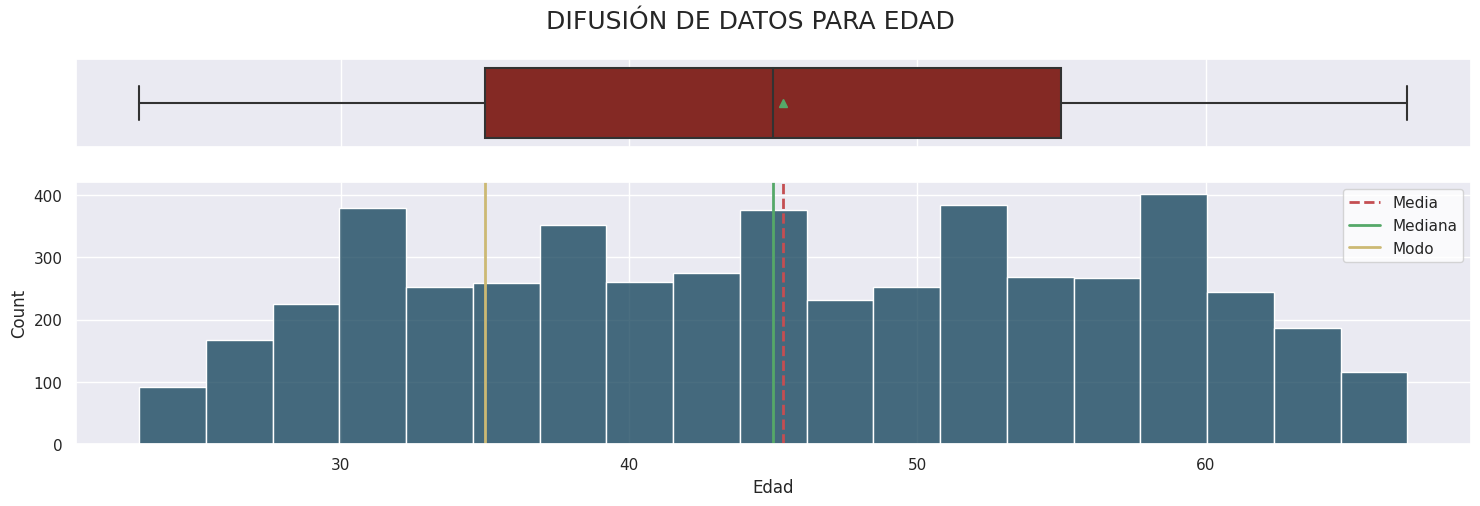

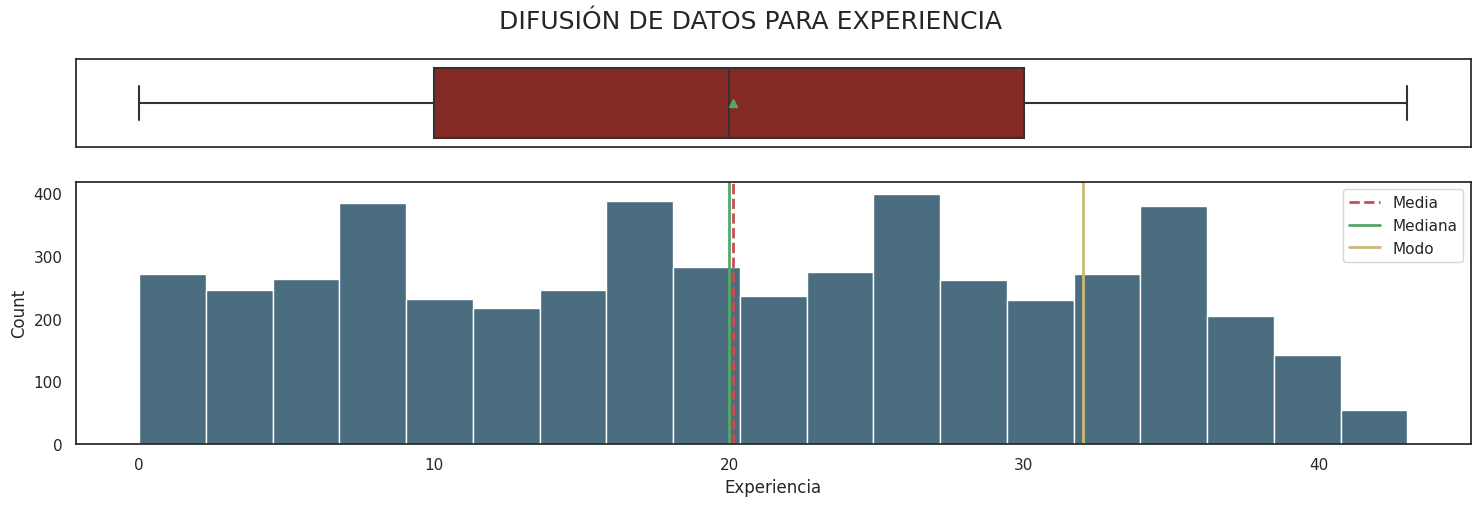

In [65]:
#seleccione todas las columnas cuantitativas para comprobar el diferencial
list_col=  ['Edad','Experiencia']
for i in range(len(list_col)):
    dist_box(df_loan[list_col[i]])

**Hipótesis y recomendaciones**

- Tanto la edad como la experiencia tienen la misma distribución con pico en 5 puntos.
- Los ingresos están sesgados a la derecha y tienen algunos valores atípicos en el lado superior que se pueden recortar.
- El crédito mensual promedio está sesgado a la derecha y tiene muchos valores atípicos en el lado superior que se pueden recortar.
- La hipoteca es en su mayoría 0 . pero está sesgado a la derecha y tiene muchos valores atípicos en el lado superior que se pueden recortar.

**<h3>Cantidad de préstamo en los distintos condados</h3>**

In [66]:
fig = px.histogram(y=df_loan['Condado'], color=df_loan['Prestamo'],
              text_auto=True, color_discrete_sequence=(hex_colors[0],hex_colors[4]))
fig.update_layout(title_text='PRESTAMO POR CONDADO', title_x=0.5,font_size=14,yaxis=dict(showgrid=False),
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  xaxis_title_text='Cantidad', # xaxis label
                  yaxis_title_text='Condado',
                  autosize=False,
                  width=1080,
                  height=1280)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

**<font color='red'><h4>Conclusión</h4></font>**

Como podemos apreciar en el condado de Los Ángeles, San Diego y Santa Clara, son los principales condados en la cual haya mayor cantidad de clientes y por ende los condados donde se podría hacer mayor énfasis, en que los clientes soliciten un préstamo. Esto se lo estudiara mas adelante agrupando la cantidad de clientes por región.

**<font color='red'><h4>Conclusion de las regiones y condados</h4></font>**

Como podemos apreciar del análisis anterior de los condados, vemos que el condado Los Ángeles, es una región, por ende es unos de los candidatos a hacer mayor énfasis, ya que es 	uno de los que mas piden prestamos por cantidad de cliente.

Otro condado son los de la región de Bay Área, que sumados es la región mas grande de las 5, que es a la cual se debería hacer mayor énfasis, en que los clientes soliciten un préstamo.

### **11.2.2 Gasto**

Para comprender el gasto de los clientes, se muestran nuevas columnas que dirán si el cliente pertenece a un gasto superior, medio o inferior.

In [67]:
df_loan.Gasto_de_tarjeta_cred.describe()

count    4989.000000
mean        1.730392
std         1.346891
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max         9.468750
Name: Gasto_de_tarjeta_cred, dtype: float64

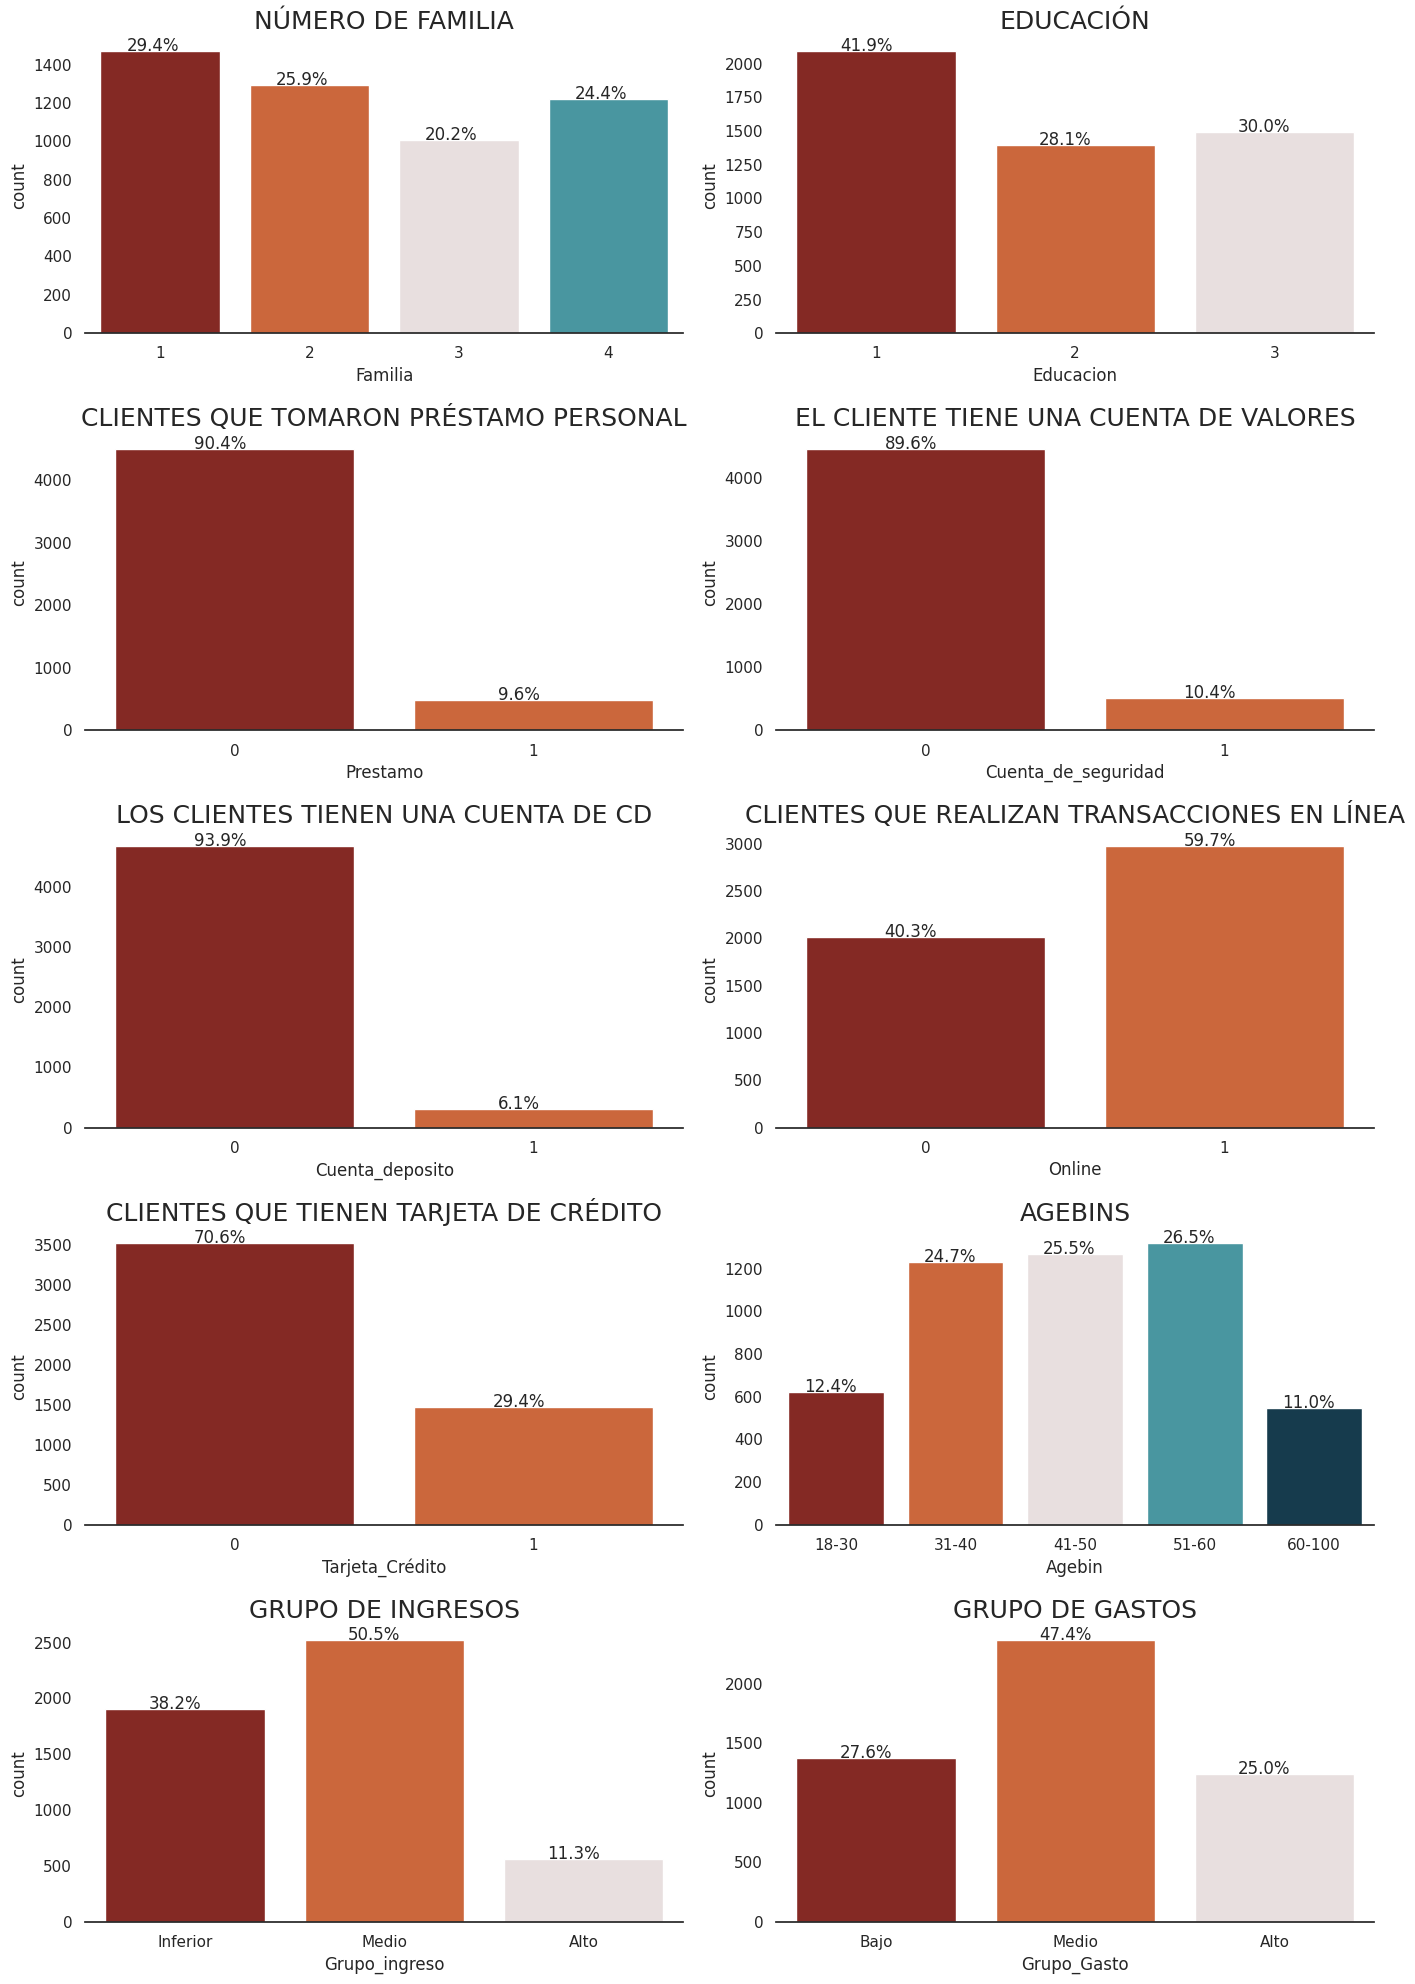

In [68]:
df_loan["Grupo_Gasto"] = pd.cut( x=df_loan["Gasto_de_tarjeta_cred"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Bajo", "Medio", "Alto"],include_lowest=True ,
)
# Hacer una lista de todas las variables categóricas
cat_columns = ['Familia','Educacion','Prestamo','Cuenta_de_seguridad',
               'Cuenta_deposito','Online','Tarjeta_Crédito','Agebin','Grupo_ingreso','Grupo_Gasto']
title=['Número de Familia','Educación','Clientes que tomaron Préstamo Personal','El cliente tiene una cuenta de valores',
       'Los clientes tienen una cuenta de CD','Clientes que realizan transacciones en línea',
       'Clientes que tienen tarjeta de crédito','Agebins', 'Grupo de ingresos', 'Grupo de gastos']
plt.figure(figsize=(14,20))

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_loan[variable].value_counts(ascending=False).index
                     sns.set_palette(rgb_colors) # setea el color
                     #sns.set_palette('Set2') #setea la paleta Set2
                     ax=sns.countplot(x=df_loan[variable], data=df_loan)
                     sns.despine(top=True,right=True,left=True) # remueve las lineas de la grafica
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper(), size=18)

**<font color='red'>Conclusión</font>**

- ~29,4 % de los clientes son solteros.
- ~41.9% de los clientes son estudiantes universitarios.
- ~9.6% compró un préstamo personal del banco.
- El 10,4 % de los clientes tiene cuenta de valores en el banco
- El 6 % de los clientes tiene una cuenta de CD.
- El 60% de los clientes realizan transacciones en línea.
- El 29,4% de los clientes tienen tarjetas de crédito.
- ~ 75 % de los clientes están en el rango de 31-60.
- ~ 50 % La mayoría de los clientes bancarios pertenecen al grupo de ingresos medios.
- ~48 % de los clientes tiene gasto medio medio

### **11.2.3 Heatmap**

In [69]:
# heatmap del dataset
fig = px.imshow(df_loan.corr(),text_auto=True, aspect="auto",color_continuous_scale=[hex_colors[4],hex_colors[0]])
fig.update_xaxes(side="top")
fig.show()

<ipython-input-69-a565b0899e47>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**<font color='red'>Conclusión</font>**

- Como era de esperar, la edad y la experiencia están altamente correlacionadas y uno de ellos puede descartarse. Como tuvimos que manejar 0, se descartará la experiencia.
- Los ingresos y el gasto promedio en tarjeta de crédito están correlacionados positivamente.
- La hipoteca tiene muy poca correlación con los ingresos.

### **11.2.4 Boxplot de comparacion**

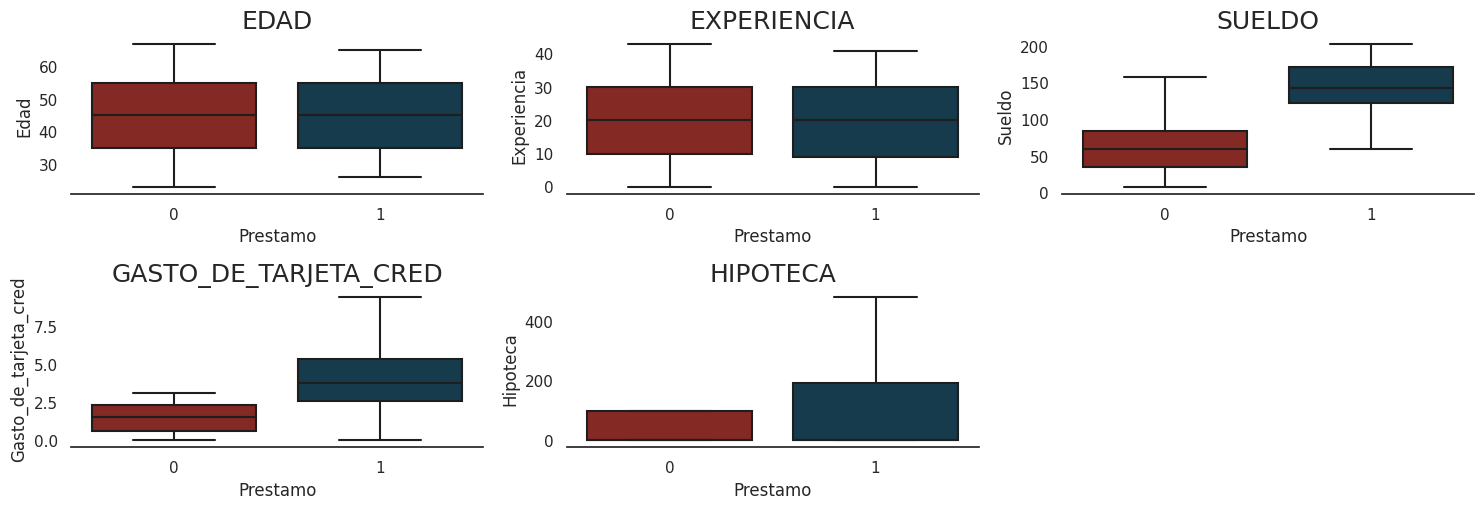

In [70]:
numeric_columns = ['Edad','Experiencia','Sueldo','Gasto_de_tarjeta_cred','Hipoteca']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette((rgb_colors[0],rgb_colors[4])))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        sns.boxplot(x='Prestamo',y= df_loan[variable], data=df_loan)
        sns.despine(top=True,right=True,left=True)
        plt.tight_layout()
        plt.title(variable.upper(), size=18)

**<font color='red'><h4>Conclusión</h4></font>**

Los sueldos y los gastos de tarjetas de crédito son los valores más significativos para los prestamistas al evaluar la elegibilidad de un solicitante para recibir financiamiento. Los sueldos más altos y los gastos de tarjetas de crédito bajos indican una mayor capacidad de pago y una buena trayectoria de pago, lo que aumenta las posibilidades de obtener un préstamo y cumplir con las obligaciones financieras del mismo en el futuro.

### **11.2.5 Densidad de hipoteca vs prestamos**

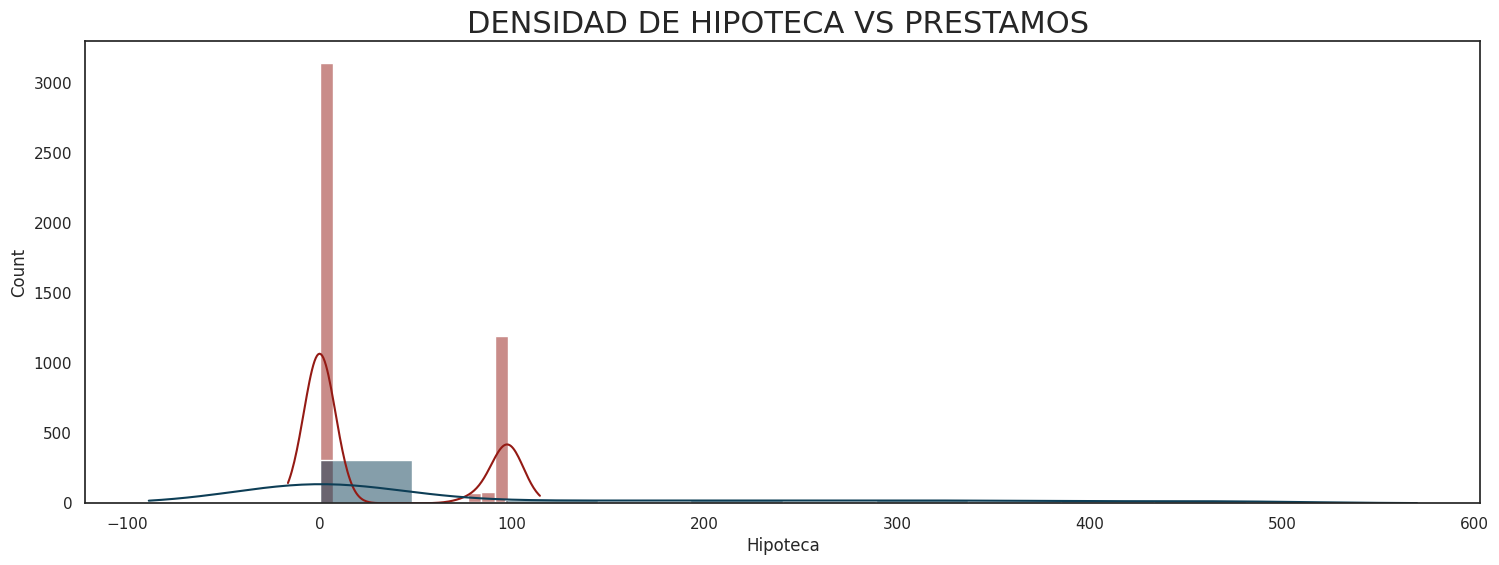

In [71]:
plt.figure(figsize=(18,6))
plt.title("DENSIDAD DE HIPOTECA VS PRESTAMOS ", size=22)
sns.histplot( df_loan[df_loan['Prestamo'] == 0]['Hipoteca'], color = rgb_colors[0], kde=True, kde_kws=dict(cut=2))
sns.histplot( df_loan[df_loan['Prestamo'] == 1]['Hipoteca'], color = rgb_colors[4], kde=True, kde_kws=dict(cut=2))
plt.show()

**<font color='red'><h4>Conclusión</h4></font>**

Podemos observar hay gran cantidad de clientes que no poseen prestamos activos, con respecto a la hipoteca, eso puede deberse a que no poseen un sueldo alto o que no les fue necesario solicitar un prestamos mientras poseen una hipoteca.

### **11.2.6 Densidad de la edad vs prestamos**

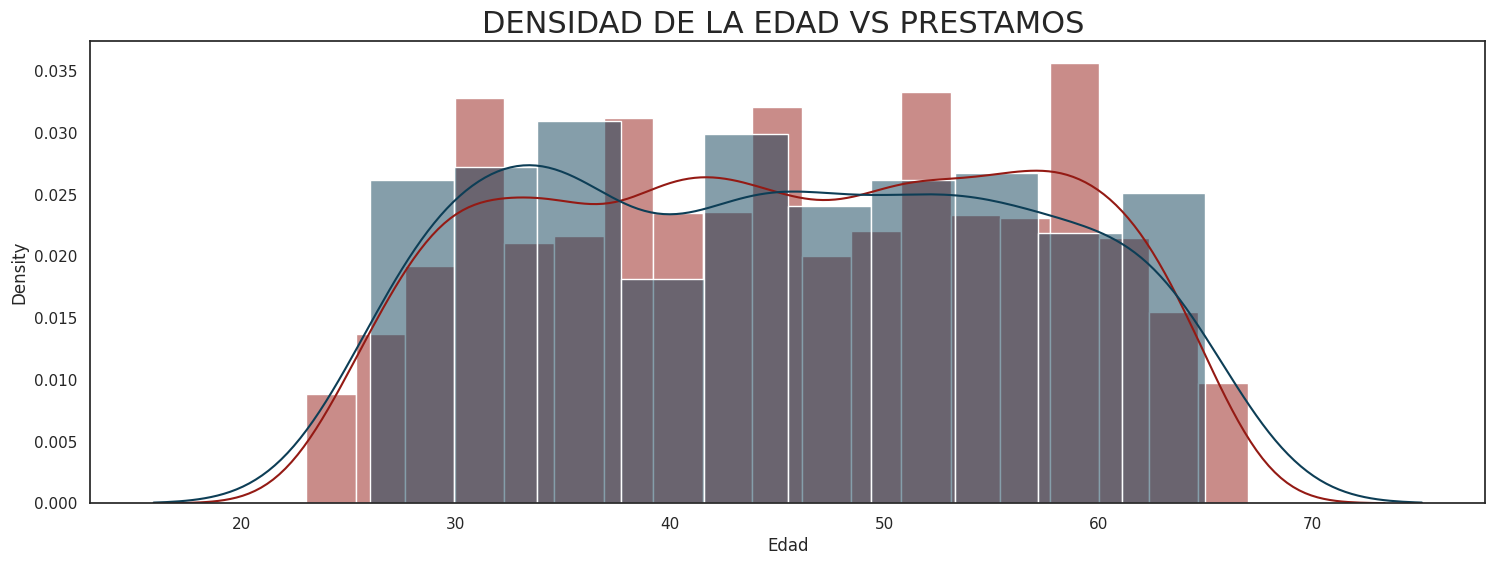

In [72]:
plt.figure(figsize=(18,6))
plt.title("DENSIDAD DE LA EDAD VS PRESTAMOS ", size=22)
sns.histplot( df_loan[df_loan['Prestamo'] == 0]['Edad'], color = rgb_colors[0], kde=True, stat="density", kde_kws=dict(cut=3))
sns.histplot( df_loan[df_loan['Prestamo'] == 1]['Edad'], color = rgb_colors[4], kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

**<font color='red'><h4>Conclusión</h4></font>**

Podemos observar que los clientes con edades mayores a 30 y menores a 60 son los que mas poseen una densidad de prestamos activos o no, con respecto al grupo de edades fuera de ese rango.

### **11.2.7 Gastos de tarjeta de credito segun la educacion**

In [73]:
fig = px.histogram(df_loan, x='Educacion',y='Gasto_de_tarjeta_cred',color='Prestamo',
             barmode='group', height=400,histfunc='avg', text_auto=True,
             color_discrete_sequence=[hex_colors[0],hex_colors[4]])
fig.update_layout(title_text='GASTOS DE TARJETA DE CREDITO SEGUN LA EDUCACION', title_x=0.5,font_size=14)
fig.show()

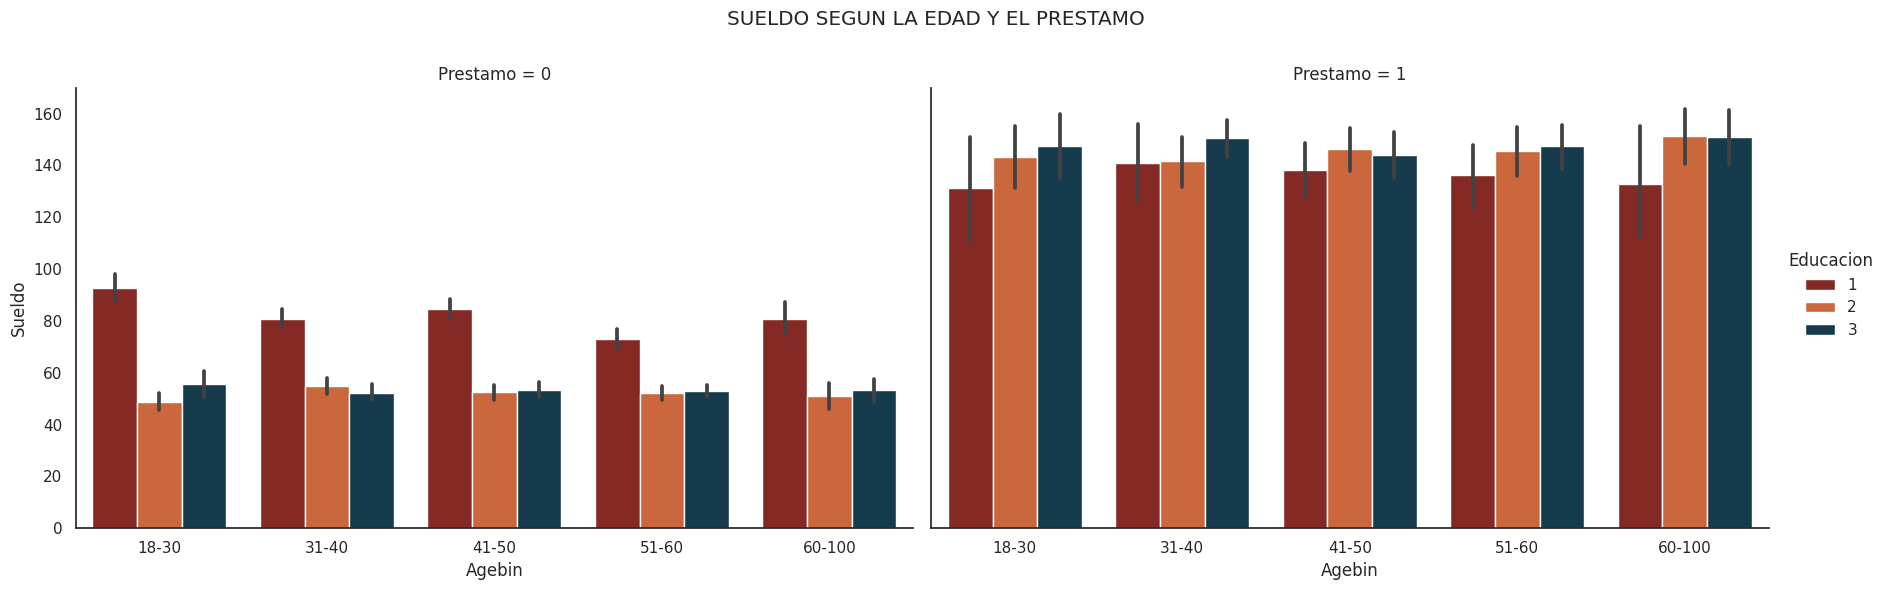

In [74]:
sns.set_palette(sns.color_palette((rgb_colors[0],rgb_colors[1],rgb_colors[4])))
g=sns.catplot(y='Sueldo',x='Agebin',hue='Educacion',kind='bar',col="Prestamo", data=df_loan,
                   height=6, aspect=1.5)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('SUELDO SEGUN LA EDAD Y EL PRESTAMO')
g.fig.show()

**<font color='red'><h4>Conclusion de los gastos segun la educacion</h4></font>**

Podemos observar que los clientes con mayor educación son los que mas utilizan las tarjetas de crédito y poseen prestamos con respecto al grupo de edades, aunque los que tienen una educación menor son los que poseen mejor sueldo a los que no poseen un préstamo activo.

**<font color='red'>Conclusion</font>**

- Las personas con mayores ingresos habían optado por préstamos personales antes.
- Las personas con hipotecas altas optaron por el préstamo.
- Los clientes con mayor uso de crédito promedio mensual han optado por el préstamo.
- Los clientes con mayores ingresos tenían un mayor uso promedio de tarjetas de crédito e hipotecas.

# **12. Estructurando un proyecto de DS III**

##**12.1 Feature Engineering**
**Verificacion de valores NULL**

Muestra la cantidad de null por cada columna

In [75]:
df_loan.isnull().sum() #NO hay valores null

Edad                     0
Experiencia              0
Sueldo                   0
CP                       0
Familia                  0
Gasto_de_tarjeta_cred    0
Educacion                0
Hipoteca                 0
Prestamo                 0
Cuenta_de_seguridad      0
Cuenta_deposito          0
Online                   0
Tarjeta_Crédito          0
Condado                  0
Agebin                   0
Grupo_ingreso            0
Region                   0
Grupo_Gasto              0
dtype: int64

**Verificamos que no tenga duplicados"**

In [76]:
df_loan[df_loan.duplicated()] #no hay filas duplicadas

,Edad,Experiencia,Sueldo,CP,Familia,Gasto_de_tarjeta_cred,Educacion,Hipoteca,Prestamo,Cuenta_de_seguridad,Cuenta_deposito,Online,Tarjeta_Crédito,Condado,Agebin,Grupo_ingreso,Region,Grupo_Gasto


**Data Cleaning:**

Observamos que algunas observaciones en las que la experiencia = -ve, pero como había una fuerte correlación con la edad, descartamos la experiencia.
También creamos la Agebid, el grupo de gasto y el grupo de ingresos para analizar si hay algún patrón en la compra de préstamos en función de estos.

Observaciones en el EDA:
- Las personas con mayores ingresos habían optado por préstamos personales antes.
- Las personas con hipotecas altas optaron por el préstamo.
- Los clientes que hayan optado por el préstamo tendrán un uso de crédito promedio mensual más alto.
- Los clientes con Familia de 3 miembros habían tomado prestados los préstamos con el banco.
- Nivel de educación 2: Graduado y 3: Avanzado/Profesional han tomado préstamos con el banco.
- Clientes que tenían certificado de depósito con el banco habían tomado prestado préstamo previamente
- La mayoría de los clientes que tenían un préstamo personal con el banco utilizaron las instalaciones en línea.
- La mayoría de los clientes que habían tomado préstamos personales antes son de la región de Los Ángeles.
- La proporción de préstamo de endeudamiento es alta en 30 y por debajo y 60 y por encima de los clientes.
- Cuantos más ingresos obtenga, más gastará y tendrá un estilo de vida "grande que la vida".
- Segmentación de clientes para préstamo de endeudamiento basado en EDA
- Los clientes con ingresos más altos tienen hipotecas más altas y un gasto promedio mensual más alto. También tienen certificado de depósito con el banco. Son nuestros clientes de alto perfil.
- Pocos Clientes en el grupo de ingresos medios no tienen hipotecas más altas y tienen menos gasto promedio mensual con tarjeta de crédito. Son clientes de perfil promedio.
- Los clientes en el grupo de ingresos más bajos tienen menos hipotecas (hay pocos valores atípicos), menos gastos mensuales. Son nuestros clientes de bajo perfil.
Acciones para el preprocesamiento de datos:

Muchas variables tienen valores atípicos que necesitan ser tratados. Podemos eliminar Experiencia, País, Código postal y Agebin, Grupo de ingresos, Grupo de gastos.

In [77]:
# Guardar el conjunto de datos antes de tratar los valores atípicos para la regresión logística.
df_Decision = df_loan.copy()

In [78]:
#dropeamos las columnas que no necesitamos para modelar
df_Decision.drop(columns=["Agebin", "CP","Condado",'Grupo_ingreso','Grupo_Gasto','Region'], inplace=True)
df_Decision = df_Decision.reindex(columns=['Edad','Experiencia','Sueldo', 'Familia','Gasto_de_tarjeta_cred','Educacion','Hipoteca','Prestamo','Cuenta_de_seguridad','Cuenta_deposito','Online','Tarjeta_Crédito'])
df_Decision.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4989 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Edad                   4989 non-null   int64   
 1   Experiencia            4989 non-null   int64   
 2   Sueldo                 4989 non-null   float64 
 3   Familia                4989 non-null   category
 4   Gasto_de_tarjeta_cred  4989 non-null   float64 
 5   Educacion              4989 non-null   category
 6   Hipoteca               4989 non-null   float64 
 7   Prestamo               4989 non-null   category
 8   Cuenta_de_seguridad    4989 non-null   category
 9   Cuenta_deposito        4989 non-null   category
 10  Online                 4989 non-null   category
 11  Tarjeta_Crédito        4989 non-null   category
dtypes: category(7), float64(3), int64(2)
memory usage: 268.9 KB


## **12.2 Arbol de decisiones**

Vamos a probar sin con las variables utilizadas en el EDA, inferimos que se cumpla la hipotesis o no y que conclusiones sacamos.

**Que variables queremos enviar a nuestro arbol de decision?**

In [79]:
df_Decision.columns

Index(['Edad', 'Experiencia', 'Sueldo', 'Familia', 'Gasto_de_tarjeta_cred',
       'Educacion', 'Hipoteca', 'Prestamo', 'Cuenta_de_seguridad',
       'Cuenta_deposito', 'Online', 'Tarjeta_Crédito'],
      dtype='object')

**Feature engineering para convertir a variables dummies**

In [80]:
X = df_Decision.drop(['Prestamo'], axis=1)
Y = df_Decision['Prestamo']

oneHotCols=['Educacion']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)
#División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajuste de escalador estándar
X_scaler = scaler.fit(X_train)

# Escalando datos
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

In [81]:
clasif = DecisionTreeClassifier(random_state=1234,max_depth=4)  #(Maxima cantidad de niveles)

In [82]:
clasif.fit(X_train, y_train) # Entrenamiento

DecisionTreeClassifier(max_depth=4, random_state=1234)

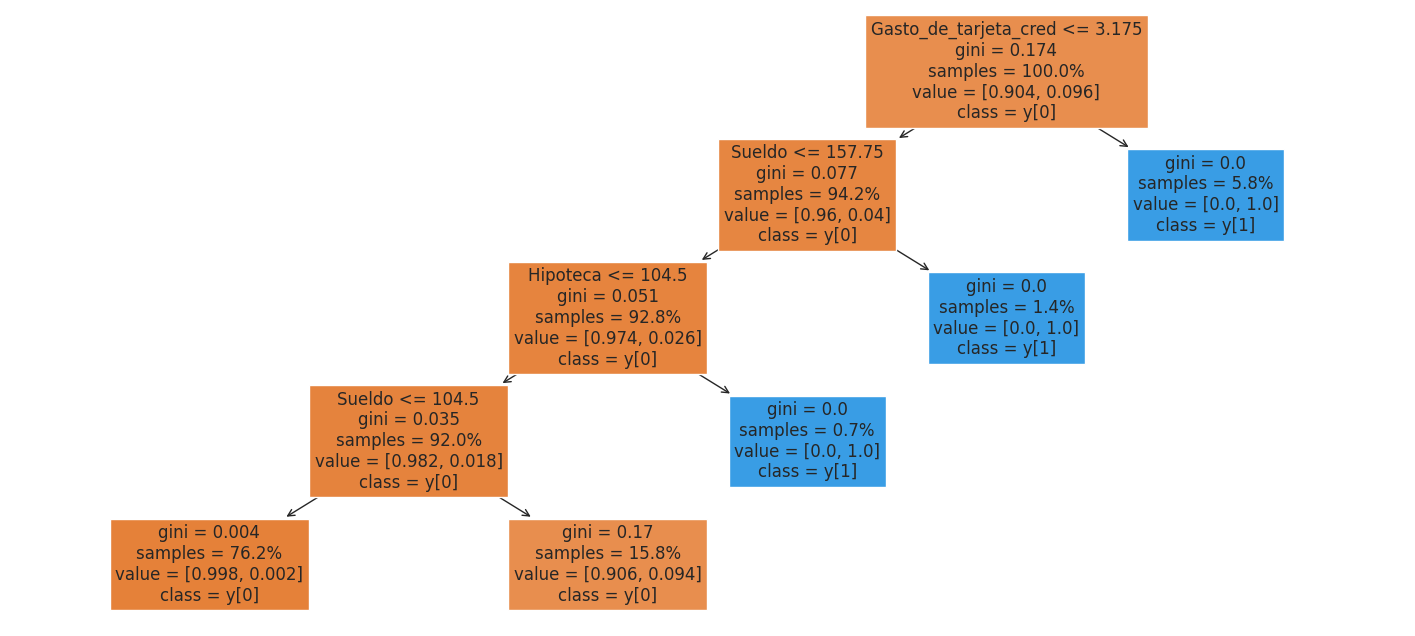

In [83]:
# Grafica
fig = plt.figure(figsize=(18,8))
tree.plot_tree(clasif,
           feature_names= X_train.columns,
           class_names=True,
           fontsize=12,
           proportion=True,
           filled=True)
plt.show()

In [84]:
y_pred = clasif.predict(X_test) # Generando predicciones

y_pred

array([0, 0, 0, ..., 0, 0, 0])

**Matriz de confusión**

In [85]:
y_pred = clasif.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [86]:
# si quisiera saber valores especificos para cada clasificacion:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('\x1b[1m'+"True negatives o Verdaderos negativos "+f"{tn}"+'\x1b[0m')
print('\x1b[1m'+"Falsos positivos "+f"{fp}"+'\x1b[0m')
print('\x1b[1m'+"Falsos Negativos "+f"{fn}"+'\x1b[0m')
print('\x1b[1m'+"True positives o verdaderos positivos "+f"{tp}"+'\x1b[0m')

True negatives o Verdaderos negativos 1353
Falsos positivos 0
Falsos Negativos 26
True positives o verdaderos positivos 118


**Perspectivas:**

**Verdaderos positivos:**

Realidad: Un cliente quería tomar un préstamo personal. Modelo de predicción: el cliente tomará un préstamo personal. Resultado: El modelo es bueno.

**Verdaderos negativos:**

Realidad: Un cliente no quería tomar un préstamo personal. Modelo de predicción: el cliente no tomará un préstamo personal. Resultado: El negocio no se ve afectado.

**Falsos positivos :**

Realidad: Un cliente no quería tomar un préstamo personal. Modelo de predicción: el cliente tomará un préstamo personal. Resultado: El equipo que se dirige a los clientes potenciales desperdiciaría sus recursos en los clientes que no comprarán un préstamo personal.

**Falsos negativos:**

Realidad: Un cliente quería tomar un préstamo personal. Modelo de predicción: el cliente no tomará un préstamo personal. Resultado: el equipo de ventas extraña al cliente potencial. Esto es pérdida de oportunidad. El propósito de la campaña era dirigirse a tales clientes. Si el equipo supiera acerca de estos clientes, podrían haber ofrecido algunas buenas tasas de APR/interés.

In [87]:
#funcion para saber accuracy score de forma manual (no con funciones libreria sklearn)
def accuracy_manual(y_test,y_pred):
  posicion=0
  valores_iguales=0
  while posicion<len(y_test):
    if y_test[posicion].any()==y_pred[posicion].any():
      valores_iguales+=1
    posicion+=1
  return valores_iguales
numero_predicciones_correctas=accuracy_manual(y_test.values, y_pred)
numero_total_predicciones=len(y_test)
accuracy_score_arbol= numero_predicciones_correctas/numero_total_predicciones

print('\x1b[1m'+"Accuracy: "+f"{accuracy_score_arbol}"+'\x1b[0m')

Accuracy: 0.9826319305277221


**Accuracy**

Funciona cuando las clases estan equilibradas o balanceadas.

In [88]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('\x1b[1m'+"Accuracy: "+f"{accuracy}"+'\x1b[0m')

Accuracy: 0.9826319305277221


**Presición**

Cuando nuestros FP (falsos positivos) son un riesgo para nosotros, queremos
minimizar los FP, que la cantidad de veces que queremos que sea 1, que sea 1 y no hayan errores para el lado de 0.


In [89]:
precision = metrics.precision_score(y_test, y_pred)
print('\x1b[1m'+"Precision: "+f"{precision}"+'\x1b[0m')

Precision: 1.0


**Recall**

En nuestro contexto, nuestra matriz dijo que cierta cantidad no va a cometer default y resulto que si, procedemos a evaluar.
Queremos minimizar el numero de FN, queriendo que la metrica salga lo mas alta posible.

In [90]:
recall_sensibilidad = metrics.recall_score(y_test, y_pred)
print('\x1b[1m'+"Recall: "+f"{recall_sensibilidad}"+'\x1b[0m')

Recall: 0.8194444444444444


Entonces estoy acertando un 83.3% aprox. diciendo que van a realizar un prestamo y estoy fallando en un 16.7% aprox. en decir que la gente no pedira un prestamo, pero en realidad si lo hara.

**F1-score**

Entre mas cercano este a 1 es un buen modelo.

In [91]:
f1_score = metrics.f1_score(y_test, y_pred)
print('\x1b[1m'+"F1 score: "+f"{f1_score}"+'\x1b[0m')

F1 score: 0.9007633587786259


In [92]:
simple=[accuracy,recall_sensibilidad,f1_score,precision]
text=["Accuracy: ","Recall: ","F1 score: ","Precision: "]
for i,variable in enumerate(simple):
  print('\x1b[1m',text[i], variable , '\x1b[0m')

 Accuracy:  0.9826319305277221 
 Recall:  0.8194444444444444 
 F1 score:  0.9007633587786259 
 Precision:  1.0 


In [93]:
metricas1 = metrics.classification_report(y_test,y_pred)
print(metricas1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       1.00      0.82      0.90       144

    accuracy                           0.98      1497
   macro avg       0.99      0.91      0.95      1497
weighted avg       0.98      0.98      0.98      1497



## **12.3 Conclusión arboles de decisiones**
En el caso de la solicitud de préstamos, este árbol de decision se utilizó para evaluar la probabilidad de que una persona o empresa sea aprobada para un préstamo en base a diferentes factores, como su historial crediticio, sus ingresos, entre otros.

Cuando los valores de estos factores son positivamente altos, como en este caso, las posibilidades de obtener un préstamo aumentan significativamente.

##**12.4 Ejemplo de evaluar si modelo tiene underfitting-overfitting**

In [94]:
y_pred = clasif.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [95]:
preds_train = clasif.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, preds_train)
print('\x1b[1m'+"Train Accuracy: "+f"{train_accuracy}"+'\x1b[0m')

Train Accuracy: 0.9833906071019473


In [96]:
train_precision = metrics.precision_score(y_train, preds_train)
print('\x1b[1m'+"Train Precision: "+f"{train_precision}"+'\x1b[0m')

Train Precision: 1.0


In [97]:
train_recall = metrics.recall_score(y_train, preds_train)
train_recall
print('\x1b[1m'+"Train Recall: "+f"{train_recall}"+'\x1b[0m')

Train Recall: 0.8273809523809523


In [98]:
train_f1_score = metrics.f1_score(y_train, preds_train)
train_f1_score
print('\x1b[1m'+"Train F1 score: "+f"{train_f1_score}"+'\x1b[0m')

Train F1 score: 0.9055374592833876


In [99]:
train=[train_accuracy,train_recall,train_f1_score,train_precision]
text=["Train Accuracy: ","Train Recall: ","Train F1 score: ","Train Precision: "]
for i,variable in enumerate(train):
  print('\x1b[1m',text[i], variable , '\x1b[0m')

 Train Accuracy:  0.9833906071019473 
 Train Recall:  0.8273809523809523 
 Train F1 score:  0.9055374592833876 
 Train Precision:  1.0 


In [100]:
metricas2 = metrics.classification_report(y_train,y_pred)
print(metricas2)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3156
           1       1.00      0.83      0.91       336

    accuracy                           0.98      3492
   macro avg       0.99      0.91      0.95      3492
weighted avg       0.98      0.98      0.98      3492



## **12.5 Conclusión underfitting-overfitting**

Pudimos realizar pruebas en todas las métricas con el y_train, y detectamos que nuestras metricas de desempeño es mejor a las del y_test por pequeña diferencia. Podemos decir que el modelo al usar y_train está sobre ajustado o entrenado (overfitting), sirve muy bien para valores que ya entreno, pero no para valores que nunca vio.

Cuando tenemos overfitting, podemos buscar mejorar nuestra métrica de desempeño para nuestro set de validación. No hay una regla exacta, es hacer varios procesos hasta encontrar algo que sirve para nuestros datos, podríamos intentar hacerlo con algunas de las siguientes maneras:
- Itearar.
- feature engineer.
- Obtener un mayor número de datos.
- Ajustar los parámetros de nuestros modelos.
- Crear modelos más simples en caso de ser posible.
- Probar con más modelos.
- Ver si nos sirve otro algoritmo nuevo y es mejor.

# **13. Models**

## **13.1 KNN**

**Cómo podemos escoger el mejor K?**

In [101]:
scaler = Normalizer()

X_train2 = scaler.fit_transform(X_train) #se aplica ajuste  y transformacion a set de entrenamiento
X_test2 = scaler.transform(X_test)  #se aplica transformacion a set de prueba

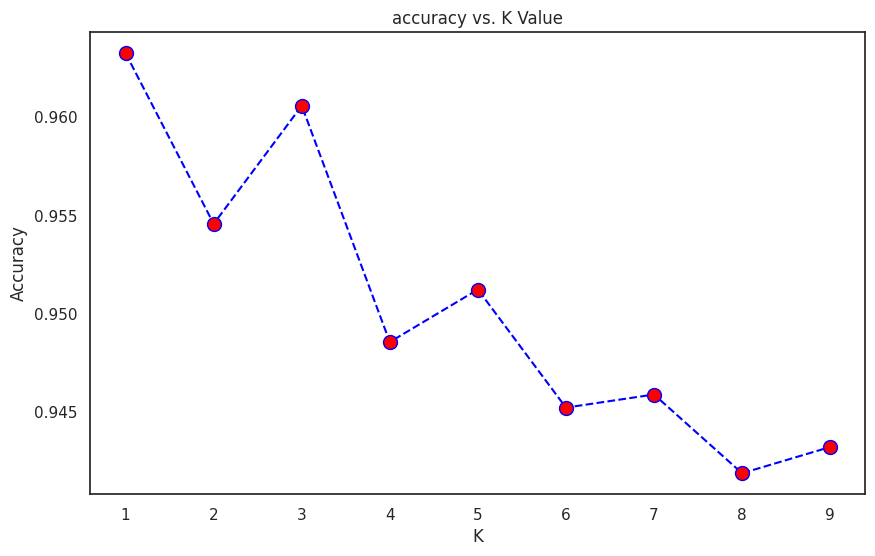

In [102]:
acc = []
number_clusters=range(1,10) #numeros del 1 al 10

#funcion para probar diferentes niveles de accuracy segun diferentes K:
for i in number_clusters:
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train2,y_train)
    y_pred = neigh.predict(X_test2)
    acc.append(accuracy_score(y_test, y_pred))


#codigo para hacer el grafico con estos datos

plt.figure(figsize=(10,6))
plt.plot(number_clusters,acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xticks(number_clusters)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

**Una vez tomamos una decision se puede continuar a crear el modelo que consideramos oficial**

In [103]:
classifier = KNeighborsClassifier(n_neighbors = 1) #n_neighbors es un valor seleccionado por data scientist
classifier.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=1)

In [104]:
y_pred = classifier.predict(X_test2)

In [105]:
X_test.head() #sin escalar

,Edad,Experiencia,Sueldo,Familia,Gasto_de_tarjeta_cred,Hipoteca,Cuenta_de_seguridad,Cuenta_deposito,Online,Tarjeta_Crédito,Educacion_2,Educacion_3
2829,35,9,82.0,1,2.5,98.0,0,0,0,0,0,0
599,28,4,103.0,2,2.5,0.0,0,0,1,1,0,0
2573,58,34,80.0,2,1.6,0.0,0,0,1,1,0,0
4178,59,35,88.0,2,1.6,98.0,0,0,0,0,0,0
1352,51,27,20.0,4,0.5,0.0,0,0,1,0,1,0


In [106]:
#predicciones que genero el algoritmo KNN
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
y_test #valores reales que habian, seran comparados con predicciones generadas

0       0
1       0
2       0
3       0
4       0
       ..
1492    0
1493    0
1494    0
1495    0
1496    0
Name: Prestamo, Length: 1497, dtype: category
Categories (2, int64): [0, 1]

In [108]:
len(y_test)

1497

In [109]:
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [110]:
accuracy_score(y_test, y_pred)

0.9632598530394122

In [111]:
metricasKNN = metrics.classification_report(y_test,y_pred)
print(metricasKNN)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1353
           1       0.92      0.68      0.78       144

    accuracy                           0.96      1497
   macro avg       0.94      0.84      0.88      1497
weighted avg       0.96      0.96      0.96      1497



In [112]:
preds_trainKNN = clasif.predict(X_train)
metricasTrainKNN = metrics.classification_report(y_train,preds_trainKNN)
print(metricasTrainKNN)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3156
           1       1.00      0.83      0.91       336

    accuracy                           0.98      3492
   macro avg       0.99      0.91      0.95      3492
weighted avg       0.98      0.98      0.98      3492



In [113]:
cm = confusion_matrix(y_train, preds_trainKNN)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

## **13.2 Random forest**

**<font color='blue'>Los hiperparámetros son parámetros ajustables que permiten controlar el proceso de entrenamiento de un modelo.</font>**

In [114]:
y_train.value_counts()

0    3156
1     336
Name: Prestamo, dtype: int64

In [115]:
len(y_train)

3492

In [116]:
#dataset desbalanceado? si

y_train.value_counts()/len(y_train)

0    0.90378
1    0.09622
Name: Prestamo, dtype: float64

In [117]:
clf=RandomForestClassifier(n_estimators=1000,
                           max_depth=10,
                           min_samples_split=5,
                           random_state=345, #reproducir resultados cada vez que se corra
                           class_weight={0:2,1:1}
                           )

In [118]:
clf.fit(X_train2,y_train) #random forest no estan obligados a usar datos escalados, pero por consistencia aplicamos el mismo dataset que en otros modelos

y_pred=clf.predict(X_test2)

In [119]:
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [120]:
accuracy_score(y_test, y_pred)

0.9706078824315297

In [121]:
metricasRF = metrics.classification_report(y_test,y_pred)
print(metricasRF)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1353
           1       1.00      0.69      0.82       144

    accuracy                           0.97      1497
   macro avg       0.98      0.85      0.90      1497
weighted avg       0.97      0.97      0.97      1497



In [122]:
preds_trainRF = clasif.predict(X_train)
metricasTrainRF = metrics.classification_report(y_train,preds_trainRF)
print(metricasTrainRF)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3156
           1       1.00      0.83      0.91       336

    accuracy                           0.98      3492
   macro avg       0.99      0.91      0.95      3492
weighted avg       0.98      0.98      0.98      3492



In [123]:
cm = confusion_matrix(y_train, preds_trainRF)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

## **13.3 Feature Importance**
* Viene de un calculo que involucra la impureza en los nodos. NO es un porcentaje NI una probabilidad.
* **Nos da una idea de cuales variables son importantes para el modelo.**
* Feature importance igual a 0 significa que feature no fue usado por el modelo para predecir.

In [124]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Edad                     0.243075
Gasto_de_tarjeta_cred    0.117011
Familia                  0.116609
Sueldo                   0.111918
Educacion_3              0.078200
Online                   0.074307
Experiencia              0.064877
Cuenta_deposito          0.063173
Educacion_2              0.050534
Hipoteca                 0.044019
Tarjeta_Crédito          0.029325
Cuenta_de_seguridad      0.006954
dtype: float64

In [125]:
color_list = color_FI.as_hex()
data = {'Features': feature_imp.index,
    'Feature Importance Score': feature_imp}
color_map = dict(zip(data['Features'], color_list))
fig = px.histogram(data, x='Feature Importance Score', y='Features', color='Features',
              text_auto=True, color_discrete_map=color_map)
fig.update_layout(title_text='Feature Importance Score', title_x=0.5, font_size=14,
                  yaxis={'categoryorder': 'total ascending', 'title': 'Features'},
                  xaxis={'title': 'Feature Importance Score'}, showlegend=False,
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()

## **13.4 Regresion logistica**

**Algunos Hiperparametros**:

* **C: default=1.0** Tiene que ser un decimal positivo.
Valores mas pequeños significan regularizacion mas fuerte. Un valor alto de hiperparámetro C indica que los datos de entrenamiento son más importantes y reflejan los datos del mundo real, mientras que un valor bajo es justo lo contrario.
  * La regularización se puede usar para entrenar modelos que generalizan mejor en datos no vistos, al evitar que el algoritmo sobreajuste el conjunto de datos de entrenamiento. Mejora resultados porque los features que no impulsan el poder predictivo de la regresión ven reducidos sus coeficientes, mientras que los features más predictivos ven coeficientes más altos a pesar de la penalización. [Link con mas explicacion](https://towardsdatascience.com/the-basics-logistic-regression-and-regularization-828b0d2d206c)


* **multi_class. Default=auto**. Para problemas multinomiales o multiclases se puede seleccionar 'ovr' o 'multinomial'. ¿Como escoger cual metodo? Se recomienda probando cada uno y viendo si hay cambios en metricas de desempeño del test set.



In [126]:
lr = LogisticRegression(C=50.0,
                        random_state=1,
                        #multi_class='ovr',
                        class_weight={0:2,1:1}
                        )

In [127]:
lr.fit(X_train2, y_train)

LogisticRegression(C=50.0, class_weight={0: 2, 1: 1}, random_state=1)

In [128]:
y_predict = lr.predict(X_test2)

In [129]:
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [130]:
accuracy_score(y_test, y_predict)

0.9398797595190381

In [131]:
metricasRL = metrics.classification_report(y_test,y_predict)
print(metricasRL)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1353
           1       1.00      0.38      0.55       144

    accuracy                           0.94      1497
   macro avg       0.97      0.69      0.76      1497
weighted avg       0.94      0.94      0.93      1497



In [132]:
preds_trainRL = clasif.predict(X_train)
metricasTrainRL = metrics.classification_report(y_train,preds_trainRL)
print(metricasTrainRL)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3156
           1       1.00      0.83      0.91       336

    accuracy                           0.98      3492
   macro avg       0.99      0.91      0.95      3492
weighted avg       0.98      0.98      0.98      3492



In [133]:
cm = confusion_matrix(y_train, preds_trainRL)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

## **13.5 SVM**

In [134]:
seed = 1234

In [135]:
clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

In [136]:
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [137]:
accuracy_score(y_test, y_predict)

0.9398797595190381

In [138]:
metricasSVM = classification_report(y_test, y_pred)
print(metricasSVM)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1353
           1       0.97      0.74      0.84       144

    accuracy                           0.97      1497
   macro avg       0.97      0.87      0.91      1497
weighted avg       0.97      0.97      0.97      1497



In [139]:
print('\x1b[1m'+ "KNN\n"+ '\x1b[0m')
print(metricasKNN)
print('-'*55)
print('\x1b[1m'+ "Random Forest\n"+ '\x1b[0m')
print(metricasRF)
print('-'*55)
print('\x1b[1m'+ "Regresion logistica\n" + '\x1b[0m')
print(metricasRL)
print('-'*55)
print('\x1b[1m'+ "SVM\n" + '\x1b[0m')
print(metricasSVM)

KNN

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1353
           1       0.92      0.68      0.78       144

    accuracy                           0.96      1497
   macro avg       0.94      0.84      0.88      1497
weighted avg       0.96      0.96      0.96      1497

-------------------------------------------------------
Random Forest

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1353
           1       1.00      0.69      0.82       144

    accuracy                           0.97      1497
   macro avg       0.98      0.85      0.90      1497
weighted avg       0.97      0.97      0.97      1497

-------------------------------------------------------
Regresion logistica

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1353
           1       1.00      0.38      0.55       144

    accuracy                 

In [140]:
preds_trainSVM = clasif.predict(X_train)
metricasTrainSVM = metrics.classification_report(y_train,preds_trainSVM)
print(metricasTrainSVM)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3156
           1       1.00      0.83      0.91       336

    accuracy                           0.98      3492
   macro avg       0.99      0.91      0.95      3492
weighted avg       0.98      0.98      0.98      3492



In [141]:
cm = confusion_matrix(y_train, preds_trainSVM)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

## **13.6 Conclusion**

En resumen, tanto el Random Forest como el SVM se destacan en términos de rendimiento en este conjunto de datos. El Random Forest muestra una alta precisión y recall para ambas clases, lo que indica que es capaz de clasificar correctamente la mayoría de las instancias de ambas clases. Por otro lado, el SVM también logra una alta precisión en la clasificación de la clase 0 y un recall decente para la clase 1. Esto sugiere que el SVM puede ser efectivo en identificar correctamente las instancias de la clase mayoritaria mientras mantiene un buen equilibrio en la clasificación de ambas clases.
En contraste, el KNN y la Regresión Logística tienen un rendimiento ligeramente inferior. El KNN muestra una precisión y recall más bajos para la clase 1, lo que implica que puede tener dificultades para identificar correctamente las instancias de esta clase. Por su parte, la Regresión Logística tiene una precisión relativamente baja para la clase 1, lo que sugiere que puede haber problemas en la clasificación de esta clase en particular.

# **14. Mejora de Modelos**

## **14.1 Mejora del modelo Random Forest**

In [142]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=42, n_estimators=500,min_samples_split=5,max_depth=5,class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, n_estimators=500, random_state=42)

In [143]:
y_pred = model.predict(X_test) #Prediccion en Test

In [144]:
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [145]:
metricasMRF = classification_report(y_test,y_pred)
print(metricasMRF)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1353
           1       0.89      0.99      0.94       144

    accuracy                           0.99      1497
   macro avg       0.95      0.99      0.97      1497
weighted avg       0.99      0.99      0.99      1497



In [146]:
y_score1 = model.predict_proba(X_test)[:,1] #para la clase 1

In [147]:
# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1) #y_score1 con las probabilidades

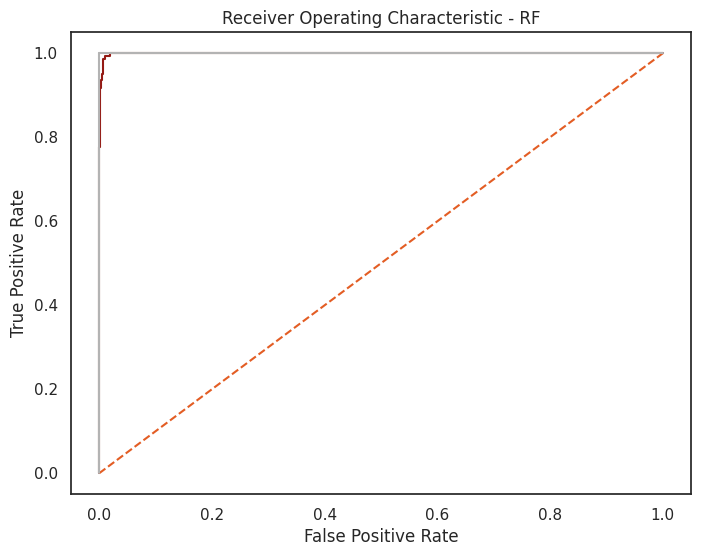

In [148]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - RF')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [149]:
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score1))

roc_auc_score for Random Forest:  0.9993224932249323


## **14.2 Mejora del modelo Decision Tree Classifier**

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42,stratify=Y) #stratify para que las proporciones de ejemplos en cada clase

In [151]:
y_train.value_counts()/len(y_train) #prueba de que stratify funciona

0    0.90378
1    0.09622
Name: Prestamo, dtype: float64

In [152]:
y_test.value_counts()/len(y_test) #prueba de que stratify funciona

0    0.903808
1    0.096192
Name: Prestamo, dtype: float64

In [153]:
#Arbol de Decision
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42)

In [154]:
#Fit
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [155]:
#Prediccion
y_pred = arbol_de_decision.predict(X_test) #umbral del 0.5

In [156]:
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [157]:
metricasDTC = classification_report(y_test,y_pred)
print(metricasDTC)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       1.00      0.80      0.89       144

    accuracy                           0.98      1497
   macro avg       0.99      0.90      0.94      1497
weighted avg       0.98      0.98      0.98      1497



In [158]:
arbol_de_decision.predict_proba(X_test)[0:10] #probabilidades resultado del arbol de decision

array([[0.99850187, 0.00149813],
       [0.99850187, 0.00149813],
       [0.99850187, 0.00149813],
       [0.99850187, 0.00149813],
       [0.99850187, 0.00149813],
       [0.90073529, 0.09926471],
       [0.        , 1.        ],
       [0.99850187, 0.00149813],
       [0.99850187, 0.00149813],
       [0.90073529, 0.09926471]])

In [159]:
y_score1 = arbol_de_decision.predict_proba(X_test)[:,1] #para la clase 1
y_score1[0:10]

array([0.00149813, 0.00149813, 0.00149813, 0.00149813, 0.00149813,
       0.09926471, 1.        , 0.00149813, 0.00149813, 0.09926471])

In [160]:
# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1) #y_score1 con las probabilidades

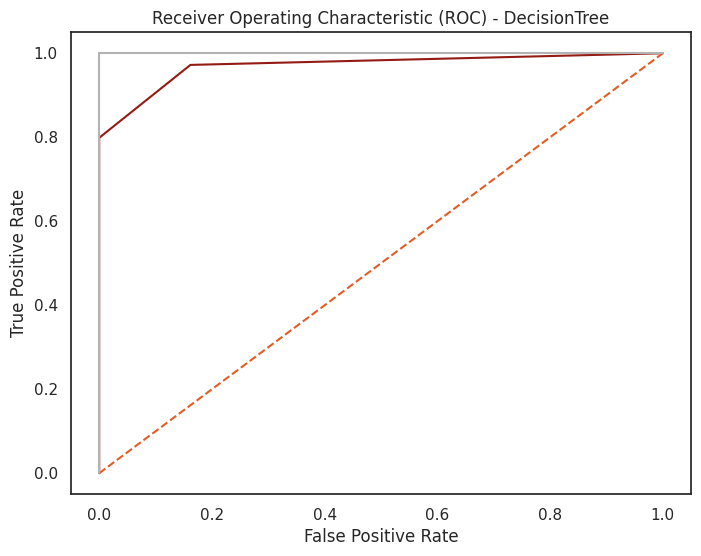

In [161]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic (ROC) - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [162]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1)) ########## metrica de ROC AUC

roc_auc_score for DecisionTree:  0.9698124538063563


En este caso, el valor de 0.9957963784183297 indica que el modelo de árbol de decisión tiene una capacidad de discriminación muy alta y es capaz de distinguir entre las clases positivas y negativas con muy pocos errores.

In [163]:
print('\x1b[1m'+ "Mejora del modelo Random Forest\n"+ '\x1b[0m')
print(metricasMRF)
print('-'*55)
print('\x1b[1m'+ "Mejora del modelo Decision Tree Classifier\n"+ '\x1b[0m')
print(metricasDTC)

Mejora del modelo Random Forest

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1353
           1       0.89      0.99      0.94       144

    accuracy                           0.99      1497
   macro avg       0.95      0.99      0.97      1497
weighted avg       0.99      0.99      0.99      1497

-------------------------------------------------------
Mejora del modelo Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       1.00      0.80      0.89       144

    accuracy                           0.98      1497
   macro avg       0.99      0.90      0.94      1497
weighted avg       0.98      0.98      0.98      1497



## **14.3 Conclusion**

Ambos modelos tienen una alta precisión en general, pero el modelo Decision Tree Classifier parece ser un poco más preciso en la clasificación de la clase minoritaria. Sin embargo, el modelo de Random Forest tiene una precisión perfecta para la etiqueta mayoritaria y un recall bastante alto para la etiqueta minoritaria.

# **15. Analisis PCA**

Encontramos que la mayoría de nuestras características están sesgadas al centro e incluso si hay alguna desviación, es nominal.

Pero por el bien del análisis univariado, revisaremos los gráficos de líneas de cada característica. así que si ya tiene una comprensión clara del análisis de sesgo, también puede saltarse esta parte

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [165]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

La lógica básica es reducir el sobreajuste y seleccionar solo los componentes necesarios. Esto se realiza ejecutando el código una y otra vez hasta encontrar el mejor valor de n_components. No incluiré eso aqui, ya que habrá una búsqueda de cuadrícula de hiperparámetros y esta adición en los parámetros de cuadrícula hará que el cálculo sea muy largo. para evitar tal caso, lo he realizado antes y he recibido la máxima precisión con todos los parámetros. Por lo tanto, solo incluiré el código aquí.

In [166]:
pca  = PCA(n_components = 8)
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [167]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [168]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

**Usando la técnica de validación KFold en el conjunto de prueba:**

In [169]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 8)
accuracies.mean()

0.9707896836226986

Después de usar y ajustar los mejores parámetros posibles, descubrimos la precisión cruzada de k y luego hacemos una inferencia. Los parámetros predeterminados del kernel rbf resultan ser los mejores parámetros posibles para el caso. Luego usaremos la matriz de confusión para obtener los casos falsos tipo 1 y tipo 2:

In [170]:
parameter = [{'C':[1, 10, 100], 'kernel':['linear']},
              {'C':[1, 10, 100], 'kernel':['rbf', 'sigmoid', 'poly'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8,  0.9]}]
grid = gcv(estimator = classifier, param_grid = parameter , scoring = 'accuracy', n_jobs = -1, cv = 3)
grid.fit(X_train, y_train)
params = grid.best_params_
score = grid.best_score_

In [171]:
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [172]:
metricasPCA = classification_report(y_test,y_pred)
print(metricasPCA)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1347
           1       1.00      0.68      0.81       150

    accuracy                           0.97      1497
   macro avg       0.98      0.84      0.90      1497
weighted avg       0.97      0.97      0.97      1497



## **15.1 Stratified K-Fold cross validation**

In [173]:
kf = StratifiedKFold(n_splits=5, #dividir en 5 secciones
                     shuffle=True,
                     random_state=24)

In [174]:
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 3991, Test set:998
Fold:2, Train set: 3991, Test set:998
Fold:3, Train set: 3991, Test set:998
Fold:4, Train set: 3991, Test set:998
Fold:5, Train set: 3992, Test set:997


In [175]:
score = cross_val_score(linear_model.LogisticRegression(random_state= 300),
                        X, Y,
                        cv= kf,
                        scoring="accuracy")
score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

array([0.97094188, 0.97194389, 0.97094188, 0.97795591, 0.97893681])

In [176]:
print(f'Average score: {"{:.2f}".format(score.mean())}')

Average score: 0.97


**<h2>Gráfico final para la matriz de confusión normalizada</h2>**

In [177]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

## **15.2 Conclusion**

Principalmente no hubo cambios en la performance del modelo, ya que se encuentra con una precisión del modelo para la clase 0 es alta, con un 96%, lo que indica que el modelo ha identificado correctamente la mayoría de los casos de la clase 0. La recuperación (recall) del modelo para la clase 1 es un poco baja, con un 68%, lo que indica que el modelo ha perdido algunos casos de la clase 1.

El puntaje F1 del modelo para la clase 1 es de 0.81, lo que indica un equilibrio razonable entre la precisión y la recuperación. En general, el modelo tiene una precisión promedio del 97%, lo que significa que ha clasificado correctamente la gran mayoría de los casos.

El puntaje F1 promedio ponderado es de 0.97, lo que sugiere que el modelo tiene un buen rendimiento general en términos de clasificación. En conclusión, aunque hay margen de mejora en la recuperación de la clase 1, el modelo parece ser bastante efectivo en la clasificación de la mayoría de los casos. El informe sugiere que el modelo tiene más dificultades para clasificar correctamente las muestras de la clase 1 que las de la clase 0.


# **16. Boosting Models**

## **16.1 XGBOOST**

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=123)

In [179]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=15,seed=42,max_depth=5, learning_rate=0.01)

In [180]:
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
X_train = sp.csr_matrix(dtrain.get_data())

clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [181]:
dtrain = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)
X_test = sp.csr_matrix(dtrain.get_data())

clf_xgb.fit(X_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [182]:
y_train_pred_xgboost = clf_xgb.predict(X_train)
y_test_pred_xgboost = clf_xgb.predict(X_test)

In [183]:
cm = confusion_matrix(y_test, y_test_pred_xgboost)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [184]:
test_accuracy = accuracy_score(y_test, y_test_pred_xgboost)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9826319305277221


In [185]:
metricasXGBOOST = classification_report(y_test, y_test_pred_xgboost)
print(metricasXGBOOST)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.98      0.84      0.91       154

    accuracy                           0.98      1497
   macro avg       0.98      0.92      0.95      1497
weighted avg       0.98      0.98      0.98      1497



In [186]:
preds_trainXGBOOST = clasif.predict(X_train)
metricasTrainXGBOOST = metrics.classification_report(y_train,preds_trainXGBOOST)
print(metricasTrainXGBOOST)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3166
           1       1.00      0.83      0.91       326

    accuracy                           0.98      3492
   macro avg       0.99      0.92      0.95      3492
weighted avg       0.98      0.98      0.98      3492



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [187]:
cm = confusion_matrix(y_train, preds_trainXGBOOST)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

## **16.2 LIGHTGBM**

In [188]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [189]:
y_pred_LGBM = clf.predict(X_test)

In [190]:
cm = confusion_matrix(y_test, y_pred)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [191]:
metricasLIGHTGBM = classification_report(y_test, y_pred_LGBM)
print(metricasLIGHTGBM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      0.97      0.98       154

    accuracy                           1.00      1497
   macro avg       1.00      0.98      0.99      1497
weighted avg       1.00      1.00      1.00      1497



In [192]:
preds_trainLIGHTGBM = clasif.predict(X_train)
metricasTrainLIGHTGBM = metrics.classification_report(y_train,preds_trainLIGHTGBM)
print(metricasTrainLIGHTGBM)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3166
           1       1.00      0.83      0.91       326

    accuracy                           0.98      3492
   macro avg       0.99      0.92      0.95      3492
weighted avg       0.98      0.98      0.98      3492



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [193]:
cm = confusion_matrix(y_train, preds_trainLIGHTGBM)
name = ['Negativo', 'Positivo']
fig = px.imshow(cm, text_auto=True, aspect="auto", color_continuous_scale=[hex_colors[4], hex_colors[0]],
                labels=dict(x="Predicted Label", y="True Label"),x=name,y=name)
fig.show()

In [194]:
print('\x1b[1m'+ "XGBOOST\n"+ '\x1b[0m')
print(metricasXGBOOST)
print('-'*55)
print('\x1b[1m'+ "LIGHTGBM\n"+ '\x1b[0m')
print(metricasLIGHTGBM)

XGBOOST

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.98      0.84      0.91       154

    accuracy                           0.98      1497
   macro avg       0.98      0.92      0.95      1497
weighted avg       0.98      0.98      0.98      1497

-------------------------------------------------------
LIGHTGBM

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      0.97      0.98       154

    accuracy                           1.00      1497
   macro avg       1.00      0.98      0.99      1497
weighted avg       1.00      1.00      1.00      1497



In [195]:
print('\x1b[1m'+ "Train XGBOOST\n"+ '\x1b[0m')
print(metricasTrainXGBOOST)
print('-'*55)
print('\x1b[1m'+ "Train LIGHTGBM\n"+ '\x1b[0m')
print(metricasTrainLIGHTGBM)

Train XGBOOST

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3166
           1       1.00      0.83      0.91       326

    accuracy                           0.98      3492
   macro avg       0.99      0.92      0.95      3492
weighted avg       0.98      0.98      0.98      3492

-------------------------------------------------------
Train LIGHTGBM

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3166
           1       1.00      0.83      0.91       326

    accuracy                           0.98      3492
   macro avg       0.99      0.92      0.95      3492
weighted avg       0.98      0.98      0.98      3492



## **16.3 Conclusion**

En términos generales, tanto XGBoost como LightGBM muestran un buen rendimiento en la clasificación de los datos proporcionados. Sin embargo, LightGBM parece tener un rendimiento ligeramente superior en la detección de la clase minoritaria, mostrando un recall y un F1-score más altos en comparación con XGBoost. Esto implica una mejor capacidad para identificar correctamente los casos positivos. Si la prioridad es la precisión en la clasificación de la clase minoritaria, LightGBM puede considerarse como la mejor opción entre los dos modelos.

# **17. Conclusion Final**

- Analizamos los datos de la campaña de Préstamos personales usando EDA y usando diferentes modelos como Clasificador de árboles de decisión para generar una probabilidad de que el Cliente solicite un Préstamo.
- Los árboles de decisión no requieren mucha preparación de datos o manejo de valores atípicos como la regresión logística. Son fáciles de entender. El árbol de decisión puede sobreajustarse fácilmente, por lo que debemos tener cuidado al usar el árbol de decisión.
- Coeficiente de Ingresos, Graduados y Educación Avanzada, Cuenta de deposito, Edad, son positivos, es decir, un aumento de una unidad en estos conducirá a un aumento en las posibilidades de que una persona tome un préstamo.
- El árbol de decisión puede sobre ajustarse fácilmente. Requieren menos pre procesamiento de datos en comparación con la regresión logística y son fáciles de entender.
- Los ingresos, los clientes con título de posgrado, los clientes que tienen 3 miembros en la familia son algunas de las variables más importantes para predecir si los clientes comprarán un préstamo personal.
- Los clientes que tienen ingresos superiores a 98k dólares, educación de nivel avanzado/graduado, una familia de más de 2, estos clientes tienen mayores posibilidades de tomar préstamos personales.
- Entonces para esta campaña podemos tener diferentes perfiles para los clientes:
 - Clientes de alto perfil: ingresos más altos, educación de nivel avanzado/graduado, 3/4 miembros de la familia, gastos elevados.
 - Perfil promedio: - Grupo de ingresos medios, educación de nivel de posgrado. 3 a 4 miembros de la familia, gasto medio
Perfil bajo: grupo de bajos ingresos, estudiantes universitarios, 3 a 4 miembros de la familia, gastos bajos.
- El gasto promedio del cliente y las hipotecas también se pueden considerar basados en EDA y regresión logística. Estos parámetros también juegan un papel en la probabilidad de comprar un préstamo.
- Primero, podemos dirigirnos a clientes de alto perfil, brindándoles un administrador de relaciones personal que pueda abordar sus inquietudes y perseguirlos para comprar un préstamo del banco con tasas de interés completas.
- La precalificación para el préstamo también puede atraer a más clientes.
- Nuestro segundo objetivo serían los clientes de perfil medio.
- El modelo no puede identificar bien si hay algunos casos excepcionales cuando el cliente de bajo perfil está listo para comprar un préstamo personal.


